In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


import pyTsetlinMachine
from pyTsetlinMachine.tm import MultiClassTsetlinMachine
from pyTsetlinMachine.tm import RegressionTsetlinMachine
from pyTsetlinMachine.tools import Binarizer


In [2]:
number_of_folds = 77

In [3]:
def k10Fold(nfolds,data):
    isOdd = False
    efsize = len(data)//nfolds
    if len(data)-efsize*nfolds:
        isOdd = True
    folds = []
    foldscounter = 0
    counter = 0
    curfold = []
    i = 0
    for item in data:
        if foldscounter < nfolds+1:   #rows / folds
            if counter < efsize :
                curfold.append(i)
                counter += 1
            else:
                foldscounter+=1
                if foldscounter != nfolds:
                    folds.append(curfold)
                    
                    curfold = []
                    curfold.append(i)
                    counter = 1
            i+=1
        else:
            curfold.append(i)
            i+=1
    folds.append(curfold)
    print(folds)
    return folds
def trainTestSpliter(testFolIndex,data):
    test_data = []
    train_data = []
    for i in range(len(data)):
        if i not in testFolIndex:
            train_data.append(data[i])
        else:
            test_data.append(data[i])
    return np.array(train_data), np.array(test_data)
def dataTargetSpluter(train_d,test_d):
    train_x = []
    train_y = []
    test_x = []
    test_y = []
    for i in train_d:
        train_x.append(i[:9])
        train_y.append(i[9])
    for i in test_d:
        test_x.append(i[:9])
        test_y.append(i[9])
    return np.array(train_x), np.array(train_y), np.array(test_x), np.array(test_y)

In [4]:
x = np.loadtxt("deshar.txt")
df = pd.DataFrame(x,columns = ["F1","F2","F3","F4","F5","F6","F7","F8","F9","Effort"])

In [5]:
"""scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)"""
scaled_data = np.array(df)

In [6]:
foldsIndex = k10Fold(number_of_folds,scaled_data)

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76]]


 
Fold  # 1


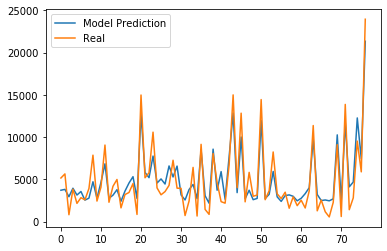

Prediction :  3704.19       real : 5152.0
Prediction :  3804.45       real : 5635.0
Prediction :  2935.53       real : 805.0
Prediction :  3938.13       real : 3829.0
Prediction :  3136.05       real : 2149.0
Prediction :  3553.8       real : 2821.0
Prediction :  2534.49       real : 2569.0
Prediction :  2768.43       real : 3913.0
Prediction :  4706.79       real : 7854.0
Prediction :  2768.43       real : 2422.0
Prediction :  4639.95       real : 4067.0
Prediction :  6828.96       real : 9051.0
Prediction :  2751.72       real : 2282.0
Prediction :  3119.34       real : 4172.0
Prediction :  3771.03       real : 4977.0
Prediction :  2400.81       real : 1617.0
Prediction :  3603.93       real : 3192.0
Prediction :  4556.4       real : 3437.0
Prediction :  5308.35       real : 4494.0
Prediction :  2735.01       real : 840.0
Prediction :  12777.72       real : 14973.0
Prediction :  5809.65       real : 5180.0
Prediction :  5191.38       real : 5775.0
Prediction :  7748.01       real : 1

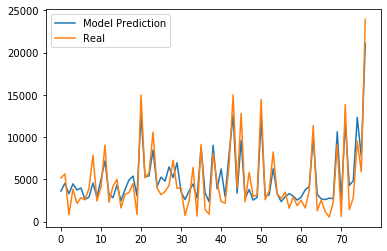

Prediction :  3603.93       real : 5152.0
Prediction :  4522.98       real : 5635.0
Prediction :  3286.44       real : 805.0
Prediction :  4456.139999999999       real : 3829.0
Prediction :  3737.61       real : 2149.0
Prediction :  3971.55       real : 2821.0
Prediction :  2618.04       real : 2569.0
Prediction :  2885.4       real : 3913.0
Prediction :  4556.4       real : 7854.0
Prediction :  2885.4       real : 2422.0
Prediction :  4957.44       real : 4067.0
Prediction :  7179.87       real : 9051.0
Prediction :  3219.6       real : 2282.0
Prediction :  2818.56       real : 4172.0
Prediction :  4339.17       real : 4977.0
Prediction :  2434.23       real : 1617.0
Prediction :  3787.74       real : 3192.0
Prediction :  4924.02       real : 3437.0
Prediction :  5375.19       real : 4494.0
Prediction :  3052.5       real : 840.0
Prediction :  12727.59       real : 14973.0
Prediction :  5258.22       real : 5180.0
Prediction :  5408.61       real : 5775.0
Prediction :  8466.54       r

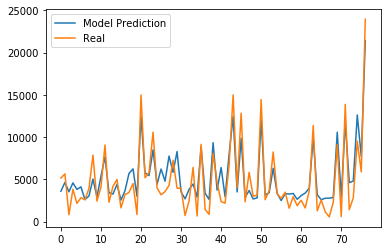

Prediction :  3587.22       real : 5152.0
Prediction :  4623.24       real : 5635.0
Prediction :  3520.38       real : 805.0
Prediction :  4573.110000000001       real : 3829.0
Prediction :  3804.45       real : 2149.0
Prediction :  4105.23       real : 2821.0
Prediction :  2601.33       real : 2569.0
Prediction :  3019.08       real : 3913.0
Prediction :  5024.28       real : 7854.0
Prediction :  2918.82       real : 2422.0
Prediction :  5341.77       real : 4067.0
Prediction :  7664.46       real : 9051.0
Prediction :  3420.12       real : 2282.0
Prediction :  3253.02       real : 4172.0
Prediction :  4389.3       real : 4977.0
Prediction :  2534.49       real : 1617.0
Prediction :  3654.06       real : 3192.0
Prediction :  5692.68       real : 3437.0
Prediction :  6227.4       real : 4494.0
Prediction :  2985.66       real : 840.0
Prediction :  12443.52       real : 14973.0
Prediction :  5759.52       real : 5180.0
Prediction :  5442.03       real : 5775.0
Prediction :  8483.25     

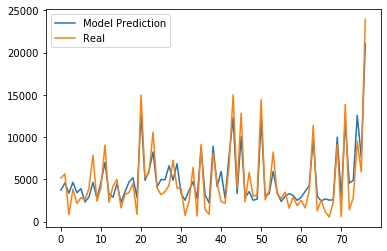

Prediction :  3704.19       real : 5152.0
Prediction :  4573.110000000001       real : 5635.0
Prediction :  3353.28       real : 805.0
Prediction :  4639.95       real : 3829.0
Prediction :  3403.41       real : 2149.0
Prediction :  3888.0       real : 2821.0
Prediction :  2317.26       real : 2569.0
Prediction :  2902.11       real : 3913.0
Prediction :  4639.95       real : 7854.0
Prediction :  2735.01       real : 2422.0
Prediction :  4639.95       real : 4067.0
Prediction :  6996.06       real : 9051.0
Prediction :  3269.73       real : 2282.0
Prediction :  2885.4       real : 4172.0
Prediction :  4489.5599999999995       real : 4977.0
Prediction :  2250.42       real : 1617.0
Prediction :  3503.67       real : 3192.0
Prediction :  4673.37       real : 3437.0
Prediction :  5191.38       real : 4494.0
Prediction :  2835.27       real : 840.0
Prediction :  12794.43       real : 14973.0
Prediction :  4873.89       real : 5180.0
Prediction :  5993.46       real : 5775.0
Prediction :  8

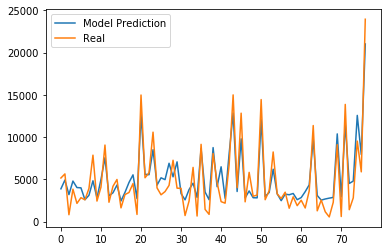

Prediction :  3871.29       real : 5152.0
Prediction :  4907.31       real : 5635.0
Prediction :  3186.18       real : 805.0
Prediction :  4790.34       real : 3829.0
Prediction :  4021.68       real : 2149.0
Prediction :  3988.26       real : 2821.0
Prediction :  2584.62       real : 2569.0
Prediction :  3102.63       real : 3913.0
Prediction :  4823.76       real : 7854.0
Prediction :  2801.85       real : 2422.0
Prediction :  4974.15       real : 4067.0
Prediction :  7547.49       real : 9051.0
Prediction :  3035.79       real : 2282.0
Prediction :  3403.41       real : 4172.0
Prediction :  4322.46       real : 4977.0
Prediction :  2434.23       real : 1617.0
Prediction :  3453.54       real : 3192.0
Prediction :  4623.24       real : 3437.0
Prediction :  5525.58       real : 4494.0
Prediction :  2718.3       real : 840.0
Prediction :  12694.17       real : 14973.0
Prediction :  5592.42       real : 5180.0
Prediction :  5542.29       real : 5775.0
Prediction :  8499.96       real : 

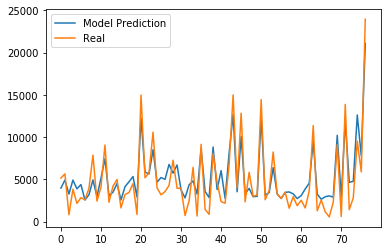

Prediction :  3954.84       real : 5152.0
Prediction :  4907.31       real : 5635.0
Prediction :  3253.02       real : 805.0
Prediction :  4907.31       real : 3829.0
Prediction :  3871.29       real : 2149.0
Prediction :  4372.59       real : 2821.0
Prediction :  2551.2       real : 2569.0
Prediction :  3169.47       real : 3913.0
Prediction :  4924.02       real : 7854.0
Prediction :  2968.95       real : 2422.0
Prediction :  5124.54       real : 4067.0
Prediction :  7430.52       real : 9051.0
Prediction :  3052.5       real : 2282.0
Prediction :  3470.25       real : 4172.0
Prediction :  4489.5599999999995       real : 4977.0
Prediction :  2551.2       real : 1617.0
Prediction :  4121.9400000000005       real : 3192.0
Prediction :  4706.79       real : 3437.0
Prediction :  5325.06       real : 4494.0
Prediction :  2902.11       real : 840.0
Prediction :  12243.0       real : 14973.0
Prediction :  5859.78       real : 5180.0
Prediction :  5625.84       real : 5775.0
Prediction :  84

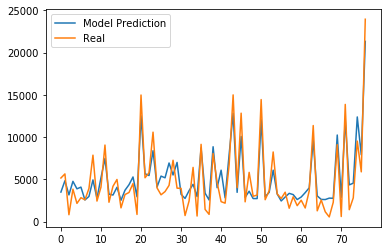

Prediction :  3486.96       real : 5152.0
Prediction :  4823.76       real : 5635.0
Prediction :  3152.76       real : 805.0
Prediction :  4756.92       real : 3829.0
Prediction :  3871.29       real : 2149.0
Prediction :  4071.81       real : 2821.0
Prediction :  2551.2       real : 2569.0
Prediction :  2968.95       real : 3913.0
Prediction :  4924.02       real : 7854.0
Prediction :  2751.72       real : 2422.0
Prediction :  5174.67       real : 4067.0
Prediction :  7463.94       real : 9051.0
Prediction :  3236.31       real : 2282.0
Prediction :  3136.05       real : 4172.0
Prediction :  4055.1       real : 4977.0
Prediction :  2517.7799999999997       real : 1617.0
Prediction :  3704.19       real : 3192.0
Prediction :  4355.88       real : 3437.0
Prediction :  5274.93       real : 4494.0
Prediction :  2935.53       real : 840.0
Prediction :  12510.36       real : 14973.0
Prediction :  5659.26       real : 5180.0
Prediction :  5442.03       real : 5775.0
Prediction :  8382.99    

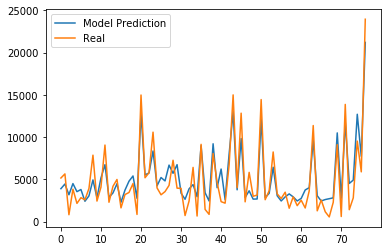

Prediction :  3888.0       real : 5152.0
Prediction :  4439.43       real : 5635.0
Prediction :  3169.47       real : 805.0
Prediction :  4489.5599999999995       real : 3829.0
Prediction :  3537.09       real : 2149.0
Prediction :  3787.74       real : 2821.0
Prediction :  2400.81       real : 2569.0
Prediction :  3035.79       real : 3913.0
Prediction :  4924.02       real : 7854.0
Prediction :  2818.56       real : 2422.0
Prediction :  5157.96       real : 4067.0
Prediction :  6728.7       real : 9051.0
Prediction :  2851.98       real : 2282.0
Prediction :  3386.7       real : 4172.0
Prediction :  4472.85       real : 4977.0
Prediction :  2283.84       real : 1617.0
Prediction :  3720.9       real : 3192.0
Prediction :  4773.63       real : 3437.0
Prediction :  5391.9       real : 4494.0
Prediction :  2751.72       real : 840.0
Prediction :  12827.85       real : 14973.0
Prediction :  5525.58       real : 5180.0
Prediction :  5742.81       real : 5775.0
Prediction :  8349.57       

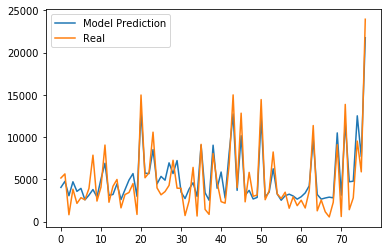

Prediction :  4038.39       real : 5152.0
Prediction :  4756.92       real : 5635.0
Prediction :  3052.5       real : 805.0
Prediction :  4706.79       real : 3829.0
Prediction :  3570.51       real : 2149.0
Prediction :  3921.42       real : 2821.0
Prediction :  2567.91       real : 2569.0
Prediction :  3119.34       real : 3913.0
Prediction :  3787.74       real : 7854.0
Prediction :  2902.11       real : 2422.0
Prediction :  5024.28       real : 4067.0
Prediction :  6895.8       real : 9051.0
Prediction :  3102.63       real : 2282.0
Prediction :  3202.89       real : 4172.0
Prediction :  4456.139999999999       real : 4977.0
Prediction :  2601.33       real : 1617.0
Prediction :  3771.03       real : 3192.0
Prediction :  4907.31       real : 3437.0
Prediction :  5675.97       real : 4494.0
Prediction :  2985.66       real : 840.0
Prediction :  13011.66       real : 14973.0
Prediction :  5726.1       real : 5180.0
Prediction :  5675.97       real : 5775.0
Prediction :  8516.67      

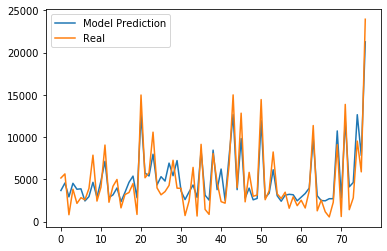

Prediction :  3670.77       real : 5152.0
Prediction :  4556.4       real : 5635.0
Prediction :  2918.82       real : 805.0
Prediction :  4522.98       real : 3829.0
Prediction :  3821.16       real : 2149.0
Prediction :  3871.29       real : 2821.0
Prediction :  2434.23       real : 2569.0
Prediction :  2952.24       real : 3913.0
Prediction :  4639.95       real : 7854.0
Prediction :  2885.4       real : 2422.0
Prediction :  4807.05       real : 4067.0
Prediction :  7129.74       real : 9051.0
Prediction :  2851.98       real : 2282.0
Prediction :  3152.76       real : 4172.0
Prediction :  3971.55       real : 4977.0
Prediction :  2350.6800000000003       real : 1617.0
Prediction :  3453.54       real : 3192.0
Prediction :  4639.95       real : 3437.0
Prediction :  5375.19       real : 4494.0
Prediction :  2818.56       real : 840.0
Prediction :  12644.04       real : 14973.0
Prediction :  5742.81       real : 5180.0
Prediction :  5391.9       real : 5775.0
Prediction :  7965.24     

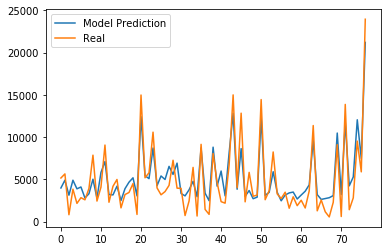

Prediction :  3971.55       real : 5152.0
Prediction :  4890.6       real : 5635.0
Prediction :  3119.34       real : 805.0
Prediction :  4890.6       real : 3829.0
Prediction :  3871.29       real : 2149.0
Prediction :  4088.52       real : 2821.0
Prediction :  2785.14       real : 2569.0
Prediction :  3286.44       real : 3913.0
Prediction :  5007.57       real : 7854.0
Prediction :  2768.43       real : 2422.0
Prediction :  5809.65       real : 4067.0
Prediction :  7096.32       real : 9051.0
Prediction :  3186.18       real : 2282.0
Prediction :  3152.76       real : 4172.0
Prediction :  4188.780000000001       real : 4977.0
Prediction :  2484.3599999999997       real : 1617.0
Prediction :  3888.0       real : 3192.0
Prediction :  4656.66       real : 3437.0
Prediction :  5174.67       real : 4494.0
Prediction :  3035.79       real : 840.0
Prediction :  12410.1       real : 14973.0
Prediction :  5425.32       real : 5180.0
Prediction :  5074.41       real : 5775.0
Prediction :  870

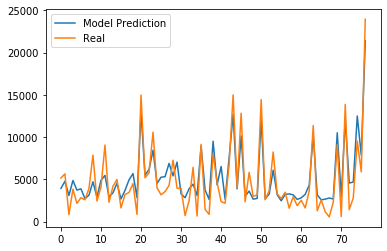

Prediction :  3921.42       real : 5152.0
Prediction :  4756.92       real : 5635.0
Prediction :  3085.92       real : 805.0
Prediction :  4857.18       real : 3829.0
Prediction :  3720.9       real : 2149.0
Prediction :  3871.29       real : 2821.0
Prediction :  2701.59       real : 2569.0
Prediction :  3119.34       real : 3913.0
Prediction :  4706.79       real : 7854.0
Prediction :  2885.4       real : 2422.0
Prediction :  4873.89       real : 4067.0
Prediction :  5458.74       real : 9051.0
Prediction :  2918.82       real : 2282.0
Prediction :  3403.41       real : 4172.0
Prediction :  4522.98       real : 4977.0
Prediction :  2668.17       real : 1617.0
Prediction :  3687.48       real : 3192.0
Prediction :  4924.02       real : 3437.0
Prediction :  5675.97       real : 4494.0
Prediction :  2835.27       real : 840.0
Prediction :  12978.24       real : 14973.0
Prediction :  5475.45       real : 5180.0
Prediction :  6160.56       real : 5775.0
Prediction :  8433.119999999999     

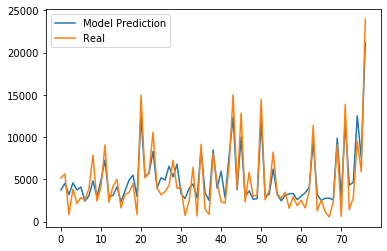

Prediction :  3737.61       real : 5152.0
Prediction :  4522.98       real : 5635.0
Prediction :  3169.47       real : 805.0
Prediction :  4573.110000000001       real : 3829.0
Prediction :  3737.61       real : 2149.0
Prediction :  4088.52       real : 2821.0
Prediction :  2417.52       real : 2569.0
Prediction :  3052.5       real : 3913.0
Prediction :  4807.05       real : 7854.0
Prediction :  2952.24       real : 2422.0
Prediction :  4873.89       real : 4067.0
Prediction :  7280.13       real : 9051.0
Prediction :  2985.66       real : 2282.0
Prediction :  3085.92       real : 4172.0
Prediction :  4121.9400000000005       real : 4977.0
Prediction :  2317.26       real : 1617.0
Prediction :  3637.35       real : 3192.0
Prediction :  4890.6       real : 3437.0
Prediction :  5492.16       real : 4494.0
Prediction :  2968.95       real : 840.0
Prediction :  12460.23       real : 14973.0
Prediction :  5308.35       real : 5180.0
Prediction :  5709.39       real : 5775.0
Prediction :  8

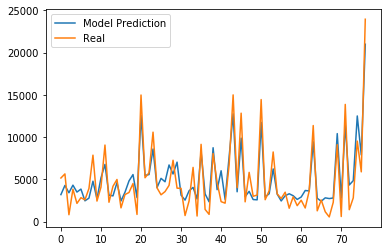

Prediction :  3186.18       real : 5152.0
Prediction :  4272.33       real : 5635.0
Prediction :  3403.41       real : 805.0
Prediction :  4305.75       real : 3829.0
Prediction :  3486.96       real : 2149.0
Prediction :  3837.87       real : 2821.0
Prediction :  2450.94       real : 2569.0
Prediction :  2768.43       real : 3913.0
Prediction :  4773.63       real : 7854.0
Prediction :  2684.88       real : 2422.0
Prediction :  5157.96       real : 4067.0
Prediction :  6762.12       real : 9051.0
Prediction :  3119.34       real : 2282.0
Prediction :  3035.79       real : 4172.0
Prediction :  4606.530000000001       real : 4977.0
Prediction :  2434.23       real : 1617.0
Prediction :  3470.25       real : 3192.0
Prediction :  4807.05       real : 3437.0
Prediction :  5559.0       real : 4494.0
Prediction :  2835.27       real : 840.0
Prediction :  12560.49       real : 14973.0
Prediction :  5458.74       real : 5180.0
Prediction :  5559.0       real : 5775.0
Prediction :  8583.51     

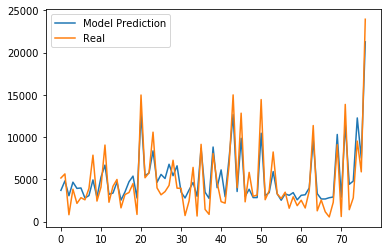

Prediction :  3687.48       real : 5152.0
Prediction :  4807.05       real : 5635.0
Prediction :  3052.5       real : 805.0
Prediction :  4656.66       real : 3829.0
Prediction :  3921.42       real : 2149.0
Prediction :  3971.55       real : 2821.0
Prediction :  2785.14       real : 2569.0
Prediction :  3069.21       real : 3913.0
Prediction :  4924.02       real : 7854.0
Prediction :  2885.4       real : 2422.0
Prediction :  5241.51       real : 4067.0
Prediction :  6678.57       real : 9051.0
Prediction :  3219.6       real : 2282.0
Prediction :  3369.99       real : 4172.0
Prediction :  4673.37       real : 4977.0
Prediction :  2534.49       real : 1617.0
Prediction :  3503.67       real : 3192.0
Prediction :  4706.79       real : 3437.0
Prediction :  5375.19       real : 4494.0
Prediction :  2785.14       real : 840.0
Prediction :  12777.72       real : 14973.0
Prediction :  5425.32       real : 5180.0
Prediction :  5742.81       real : 5775.0
Prediction :  8366.279999999999      

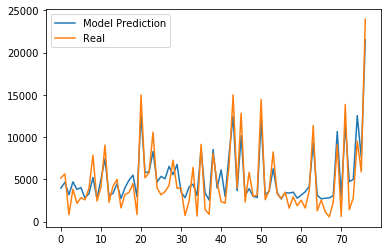

Prediction :  3954.84       real : 5152.0
Prediction :  4639.95       real : 5635.0
Prediction :  3169.47       real : 805.0
Prediction :  4690.08       real : 3829.0
Prediction :  3804.45       real : 2149.0
Prediction :  4021.68       real : 2821.0
Prediction :  2785.14       real : 2569.0
Prediction :  3303.15       real : 3913.0
Prediction :  5208.09       real : 7854.0
Prediction :  2718.3       real : 2422.0
Prediction :  4990.86       real : 4067.0
Prediction :  7413.81       real : 9051.0
Prediction :  3085.92       real : 2282.0
Prediction :  3336.57       real : 4172.0
Prediction :  4456.139999999999       real : 4977.0
Prediction :  2718.3       real : 1617.0
Prediction :  4004.97       real : 3192.0
Prediction :  4890.6       real : 3437.0
Prediction :  5492.16       real : 4494.0
Prediction :  2935.53       real : 840.0
Prediction :  12660.75       real : 14973.0
Prediction :  5809.65       real : 5180.0
Prediction :  5859.78       real : 5775.0
Prediction :  8299.43999999

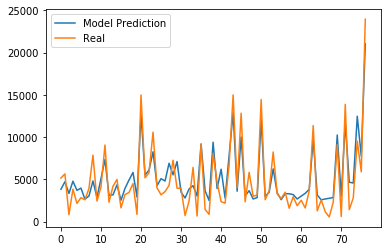

Prediction :  3821.16       real : 5152.0
Prediction :  4706.79       real : 5635.0
Prediction :  3319.86       real : 805.0
Prediction :  4773.63       real : 3829.0
Prediction :  3687.48       real : 2149.0
Prediction :  3954.84       real : 2821.0
Prediction :  2651.46       real : 2569.0
Prediction :  3019.08       real : 3913.0
Prediction :  4807.05       real : 7854.0
Prediction :  2851.98       real : 2422.0
Prediction :  5057.7       real : 4067.0
Prediction :  7346.97       real : 9051.0
Prediction :  3102.63       real : 2282.0
Prediction :  3152.76       real : 4172.0
Prediction :  4339.17       real : 4977.0
Prediction :  2517.7799999999997       real : 1617.0
Prediction :  3921.42       real : 3192.0
Prediction :  4907.31       real : 3437.0
Prediction :  5809.65       real : 4494.0
Prediction :  2902.11       real : 840.0
Prediction :  12727.59       real : 14973.0
Prediction :  5508.87       real : 5180.0
Prediction :  6093.72       real : 5775.0
Prediction :  8249.31000

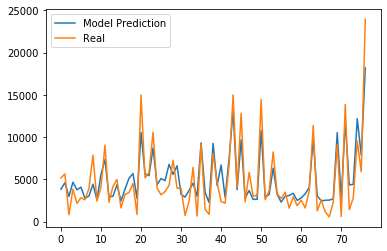

Prediction :  3821.16       real : 5152.0
Prediction :  4589.82       real : 5635.0
Prediction :  2968.95       real : 805.0
Prediction :  4656.66       real : 3829.0
Prediction :  3754.32       real : 2149.0
Prediction :  4071.81       real : 2821.0
Prediction :  2751.72       real : 2569.0
Prediction :  3019.08       real : 3913.0
Prediction :  4422.719999999999       real : 7854.0
Prediction :  2567.91       real : 2422.0
Prediction :  5575.71       real : 4067.0
Prediction :  7346.97       real : 9051.0
Prediction :  2952.24       real : 2282.0
Prediction :  2985.66       real : 4172.0
Prediction :  4355.88       real : 4977.0
Prediction :  2434.23       real : 1617.0
Prediction :  3821.16       real : 3192.0
Prediction :  5124.54       real : 3437.0
Prediction :  5675.97       real : 4494.0
Prediction :  2735.01       real : 840.0
Prediction :  10538.58       real : 14973.0
Prediction :  5642.55       real : 5180.0
Prediction :  5425.32       real : 5775.0
Prediction :  8700.48   

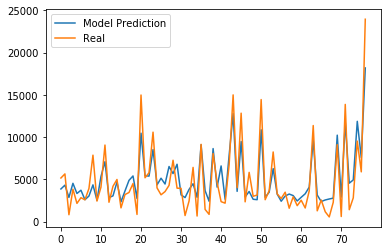

Prediction :  3854.58       real : 5152.0
Prediction :  4305.75       real : 5635.0
Prediction :  2851.98       real : 805.0
Prediction :  4522.98       real : 3829.0
Prediction :  3319.86       real : 2149.0
Prediction :  3704.19       real : 2821.0
Prediction :  2584.62       real : 2569.0
Prediction :  3019.08       real : 3913.0
Prediction :  4339.17       real : 7854.0
Prediction :  2517.7799999999997       real : 2422.0
Prediction :  5325.06       real : 4067.0
Prediction :  7079.61       real : 9051.0
Prediction :  2835.27       real : 2282.0
Prediction :  3035.79       real : 4172.0
Prediction :  4673.37       real : 4977.0
Prediction :  2333.9700000000003       real : 1617.0
Prediction :  3620.64       real : 3192.0
Prediction :  4873.89       real : 3437.0
Prediction :  5391.9       real : 4494.0
Prediction :  2735.01       real : 840.0
Prediction :  10455.03       real : 14973.0
Prediction :  5425.32       real : 5180.0
Prediction :  5375.19       real : 5775.0
Prediction : 

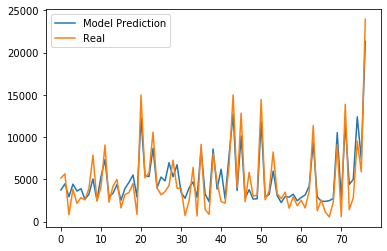

Prediction :  3737.61       real : 5152.0
Prediction :  4456.139999999999       real : 5635.0
Prediction :  2935.53       real : 805.0
Prediction :  4422.719999999999       real : 3829.0
Prediction :  3603.93       real : 2149.0
Prediction :  3888.0       real : 2821.0
Prediction :  2634.75       real : 2569.0
Prediction :  3236.31       real : 3913.0
Prediction :  5040.99       real : 7854.0
Prediction :  2517.7799999999997       real : 2422.0
Prediction :  5291.64       real : 4067.0
Prediction :  7330.26       real : 9051.0
Prediction :  2935.53       real : 2282.0
Prediction :  3336.57       real : 4172.0
Prediction :  4372.59       real : 4977.0
Prediction :  2517.7799999999997       real : 1617.0
Prediction :  3921.42       real : 3192.0
Prediction :  4639.95       real : 3437.0
Prediction :  5508.87       real : 4494.0
Prediction :  2885.4       real : 840.0
Prediction :  12293.13       real : 14973.0
Prediction :  5391.9       real : 5180.0
Prediction :  5325.06       real : 57

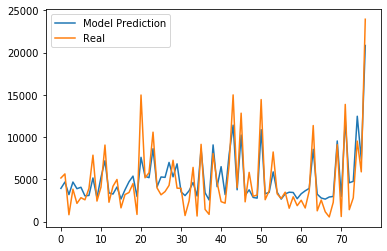

Prediction :  3921.42       real : 5152.0
Prediction :  4673.37       real : 5635.0
Prediction :  3186.18       real : 805.0
Prediction :  4673.37       real : 3829.0
Prediction :  3888.0       real : 2149.0
Prediction :  4055.1       real : 2821.0
Prediction :  3035.79       real : 2569.0
Prediction :  3085.92       real : 3913.0
Prediction :  5157.96       real : 7854.0
Prediction :  2818.56       real : 2422.0
Prediction :  5224.8       real : 4067.0
Prediction :  7196.58       real : 9051.0
Prediction :  3386.7       real : 2282.0
Prediction :  3253.02       real : 4172.0
Prediction :  4088.52       real : 4977.0
Prediction :  2668.17       real : 1617.0
Prediction :  3754.32       real : 3192.0
Prediction :  4706.79       real : 3437.0
Prediction :  5375.19       real : 4494.0
Prediction :  2968.95       real : 840.0
Prediction :  7597.62       real : 14973.0
Prediction :  5358.48       real : 5180.0
Prediction :  5191.38       real : 5775.0
Prediction :  8616.93       real : 1057

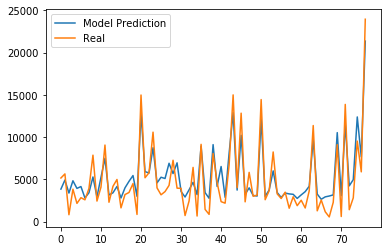

Prediction :  3837.87       real : 5152.0
Prediction :  4907.31       real : 5635.0
Prediction :  3369.99       real : 805.0
Prediction :  4823.76       real : 3829.0
Prediction :  3921.42       real : 2149.0
Prediction :  4138.65       real : 2821.0
Prediction :  2785.14       real : 2569.0
Prediction :  3403.41       real : 3913.0
Prediction :  5274.93       real : 7854.0
Prediction :  2918.82       real : 2422.0
Prediction :  5224.8       real : 4067.0
Prediction :  7480.65       real : 9051.0
Prediction :  3136.05       real : 2282.0
Prediction :  3403.41       real : 4172.0
Prediction :  4155.360000000001       real : 4977.0
Prediction :  2785.14       real : 1617.0
Prediction :  3988.26       real : 3192.0
Prediction :  4756.92       real : 3437.0
Prediction :  5442.03       real : 4494.0
Prediction :  2985.66       real : 840.0
Prediction :  12827.85       real : 14973.0
Prediction :  5909.91       real : 5180.0
Prediction :  5742.81       real : 5775.0
Prediction :  8733.9     

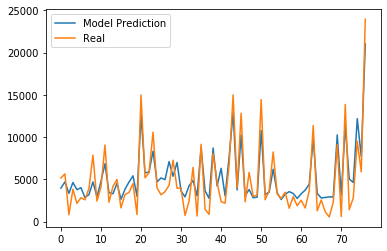

Prediction :  3954.84       real : 5152.0
Prediction :  4690.08       real : 5635.0
Prediction :  3336.57       real : 805.0
Prediction :  4623.24       real : 3829.0
Prediction :  3771.03       real : 2149.0
Prediction :  4004.97       real : 2821.0
Prediction :  2835.27       real : 2569.0
Prediction :  3186.18       real : 3913.0
Prediction :  4690.08       real : 7854.0
Prediction :  2935.53       real : 2422.0
Prediction :  4740.21       real : 4067.0
Prediction :  6845.67       real : 9051.0
Prediction :  3420.12       real : 2282.0
Prediction :  3286.44       real : 4172.0
Prediction :  4522.98       real : 4977.0
Prediction :  2634.75       real : 1617.0
Prediction :  3821.16       real : 3192.0
Prediction :  4673.37       real : 3437.0
Prediction :  5408.61       real : 4494.0
Prediction :  2985.66       real : 840.0
Prediction :  12627.33       real : 14973.0
Prediction :  5759.52       real : 5180.0
Prediction :  5859.78       real : 5775.0
Prediction :  8332.86       real :

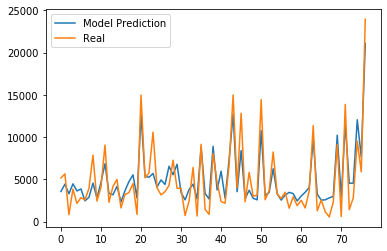

Prediction :  3553.8       real : 5152.0
Prediction :  4422.719999999999       real : 5635.0
Prediction :  3286.44       real : 805.0
Prediction :  4456.139999999999       real : 3829.0
Prediction :  3620.64       real : 2149.0
Prediction :  3854.58       real : 2821.0
Prediction :  2450.94       real : 2569.0
Prediction :  2868.69       real : 3913.0
Prediction :  4539.6900000000005       real : 7854.0
Prediction :  2785.14       real : 2422.0
Prediction :  4623.24       real : 4067.0
Prediction :  6845.67       real : 9051.0
Prediction :  3336.57       real : 2282.0
Prediction :  3169.47       real : 4172.0
Prediction :  4172.07       real : 4977.0
Prediction :  2317.26       real : 1617.0
Prediction :  3654.06       real : 3192.0
Prediction :  4740.21       real : 3437.0
Prediction :  5525.58       real : 4494.0
Prediction :  2785.14       real : 840.0
Prediction :  12660.75       real : 14973.0
Prediction :  5341.77       real : 5180.0
Prediction :  5241.51       real : 5775.0
Pred

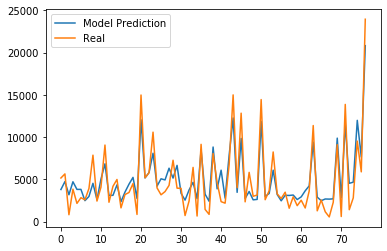

Prediction :  3787.74       real : 5152.0
Prediction :  4723.5       real : 5635.0
Prediction :  3169.47       real : 805.0
Prediction :  4706.79       real : 3829.0
Prediction :  3804.45       real : 2149.0
Prediction :  3804.45       real : 2821.0
Prediction :  2467.65       real : 2569.0
Prediction :  2968.95       real : 3913.0
Prediction :  4522.98       real : 7854.0
Prediction :  2584.62       real : 2422.0
Prediction :  5024.28       real : 4067.0
Prediction :  6828.96       real : 9051.0
Prediction :  3085.92       real : 2282.0
Prediction :  3102.63       real : 4172.0
Prediction :  4339.17       real : 4977.0
Prediction :  2350.6800000000003       real : 1617.0
Prediction :  3486.96       real : 3192.0
Prediction :  4422.719999999999       real : 3437.0
Prediction :  5224.8       real : 4494.0
Prediction :  2735.01       real : 840.0
Prediction :  12042.48       real : 14973.0
Prediction :  5157.96       real : 5180.0
Prediction :  5792.94       real : 5775.0
Prediction :  8

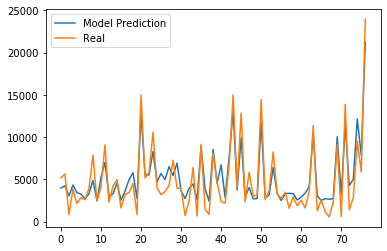

Prediction :  3971.55       real : 5152.0
Prediction :  4222.2       real : 5635.0
Prediction :  3019.08       real : 805.0
Prediction :  4322.46       real : 3829.0
Prediction :  3403.41       real : 2149.0
Prediction :  3253.02       real : 2821.0
Prediction :  2668.17       real : 2569.0
Prediction :  3286.44       real : 3913.0
Prediction :  4873.89       real : 7854.0
Prediction :  2467.65       real : 2422.0
Prediction :  5208.09       real : 4067.0
Prediction :  6996.06       real : 9051.0
Prediction :  3002.37       real : 2282.0
Prediction :  3269.73       real : 4172.0
Prediction :  4556.4       real : 4977.0
Prediction :  2534.49       real : 1617.0
Prediction :  3570.51       real : 3192.0
Prediction :  4940.73       real : 3437.0
Prediction :  5776.23       real : 4494.0
Prediction :  2718.3       real : 840.0
Prediction :  12811.14       real : 14973.0
Prediction :  5592.42       real : 5180.0
Prediction :  5508.87       real : 5775.0
Prediction :  8299.439999999999      

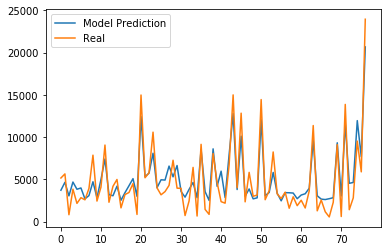

Prediction :  3704.19       real : 5152.0
Prediction :  4639.95       real : 5635.0
Prediction :  3035.79       real : 805.0
Prediction :  4673.37       real : 3829.0
Prediction :  3821.16       real : 2149.0
Prediction :  3971.55       real : 2821.0
Prediction :  2684.88       real : 2569.0
Prediction :  3069.21       real : 3913.0
Prediction :  4706.79       real : 7854.0
Prediction :  2818.56       real : 2422.0
Prediction :  4974.15       real : 4067.0
Prediction :  7397.1       real : 9051.0
Prediction :  3169.47       real : 2282.0
Prediction :  3052.5       real : 4172.0
Prediction :  4188.780000000001       real : 4977.0
Prediction :  2517.7799999999997       real : 1617.0
Prediction :  3420.12       real : 3192.0
Prediction :  4238.91       real : 3437.0
Prediction :  5074.41       real : 4494.0
Prediction :  2985.66       real : 840.0
Prediction :  12426.81       real : 14973.0
Prediction :  5308.35       real : 5180.0
Prediction :  5726.1       real : 5775.0
Prediction :  80

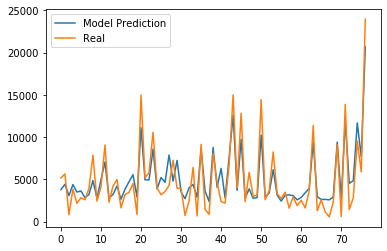

Prediction :  3771.03       real : 5152.0
Prediction :  4406.01       real : 5635.0
Prediction :  3069.21       real : 805.0
Prediction :  4372.59       real : 3829.0
Prediction :  3486.96       real : 2149.0
Prediction :  3620.64       real : 2821.0
Prediction :  2818.56       real : 2569.0
Prediction :  3202.89       real : 3913.0
Prediction :  4840.47       real : 7854.0
Prediction :  2768.43       real : 2422.0
Prediction :  4940.73       real : 4067.0
Prediction :  7046.19       real : 9051.0
Prediction :  2801.85       real : 2282.0
Prediction :  3202.89       real : 4172.0
Prediction :  4205.49       real : 4977.0
Prediction :  2634.75       real : 1617.0
Prediction :  3821.16       real : 3192.0
Prediction :  4706.79       real : 3437.0
Prediction :  5542.29       real : 4494.0
Prediction :  2902.11       real : 840.0
Prediction :  11090.01       real : 14973.0
Prediction :  4940.73       real : 5180.0
Prediction :  4924.02       real : 5775.0
Prediction :  8566.8       real : 

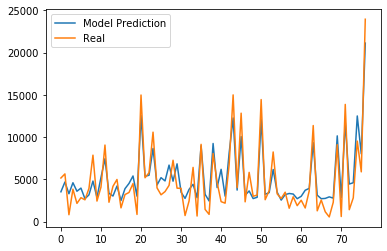

Prediction :  3520.38       real : 5152.0
Prediction :  4673.37       real : 5635.0
Prediction :  3286.44       real : 805.0
Prediction :  4589.82       real : 3829.0
Prediction :  3587.22       real : 2149.0
Prediction :  3954.84       real : 2821.0
Prediction :  2701.59       real : 2569.0
Prediction :  3152.76       real : 3913.0
Prediction :  4790.34       real : 7854.0
Prediction :  2851.98       real : 2422.0
Prediction :  5208.09       real : 4067.0
Prediction :  7430.52       real : 9051.0
Prediction :  3336.57       real : 2282.0
Prediction :  3019.08       real : 4172.0
Prediction :  4205.49       real : 4977.0
Prediction :  2484.3599999999997       real : 1617.0
Prediction :  3888.0       real : 3192.0
Prediction :  4506.27       real : 3437.0
Prediction :  5391.9       real : 4494.0
Prediction :  3002.37       real : 840.0
Prediction :  12543.78       real : 14973.0
Prediction :  5358.48       real : 5180.0
Prediction :  5475.45       real : 5775.0
Prediction :  8650.35    

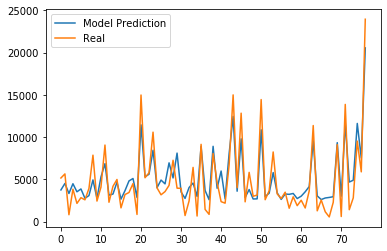

Prediction :  3737.61       real : 5152.0
Prediction :  4506.27       real : 5635.0
Prediction :  3319.86       real : 805.0
Prediction :  4472.85       real : 3829.0
Prediction :  3520.38       real : 2149.0
Prediction :  3854.58       real : 2821.0
Prediction :  2751.72       real : 2569.0
Prediction :  3069.21       real : 3913.0
Prediction :  4924.02       real : 7854.0
Prediction :  2751.72       real : 2422.0
Prediction :  5274.93       real : 4067.0
Prediction :  6845.67       real : 9051.0
Prediction :  3119.34       real : 2282.0
Prediction :  3253.02       real : 4172.0
Prediction :  4656.66       real : 4977.0
Prediction :  2651.46       real : 1617.0
Prediction :  3654.06       real : 3192.0
Prediction :  4807.05       real : 3437.0
Prediction :  5091.12       real : 4494.0
Prediction :  2851.98       real : 840.0
Prediction :  11440.92       real : 14973.0
Prediction :  5308.35       real : 5180.0
Prediction :  5592.42       real : 5775.0
Prediction :  8433.119999999999   

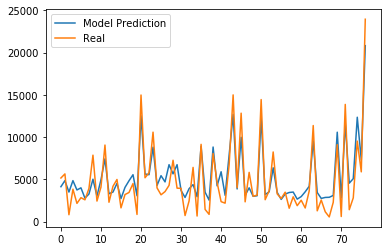

Prediction :  4121.9400000000005       real : 5152.0
Prediction :  4840.47       real : 5635.0
Prediction :  3486.96       real : 805.0
Prediction :  4840.47       real : 3829.0
Prediction :  3737.61       real : 2149.0
Prediction :  3988.26       real : 2821.0
Prediction :  2768.43       real : 2569.0
Prediction :  3253.02       real : 3913.0
Prediction :  5007.57       real : 7854.0
Prediction :  3019.08       real : 2422.0
Prediction :  4940.73       real : 4067.0
Prediction :  7413.81       real : 9051.0
Prediction :  3286.44       real : 2282.0
Prediction :  3486.96       real : 4172.0
Prediction :  4522.98       real : 4977.0
Prediction :  2718.3       real : 1617.0
Prediction :  4038.39       real : 3192.0
Prediction :  4823.76       real : 3437.0
Prediction :  5542.29       real : 4494.0
Prediction :  3052.5       real : 840.0
Prediction :  12510.36       real : 14973.0
Prediction :  5625.84       real : 5180.0
Prediction :  5542.29       real : 5775.0
Prediction :  8800.74    

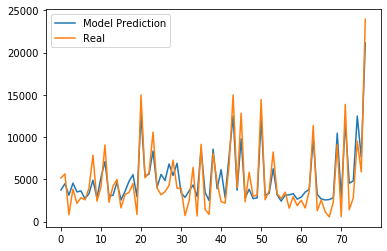

Prediction :  3737.61       real : 5152.0
Prediction :  4472.85       real : 5635.0
Prediction :  3119.34       real : 805.0
Prediction :  4539.6900000000005       real : 3829.0
Prediction :  3503.67       real : 2149.0
Prediction :  3620.64       real : 2821.0
Prediction :  2701.59       real : 2569.0
Prediction :  3286.44       real : 3913.0
Prediction :  4890.6       real : 7854.0
Prediction :  2785.14       real : 2422.0
Prediction :  5224.8       real : 4067.0
Prediction :  7096.32       real : 9051.0
Prediction :  3035.79       real : 2282.0
Prediction :  3102.63       real : 4172.0
Prediction :  4639.95       real : 4977.0
Prediction :  2551.2       real : 1617.0
Prediction :  3553.8       real : 3192.0
Prediction :  4756.92       real : 3437.0
Prediction :  5542.29       real : 4494.0
Prediction :  2935.53       real : 840.0
Prediction :  12660.75       real : 14973.0
Prediction :  5358.48       real : 5180.0
Prediction :  5609.13       real : 5775.0
Prediction :  8349.57      

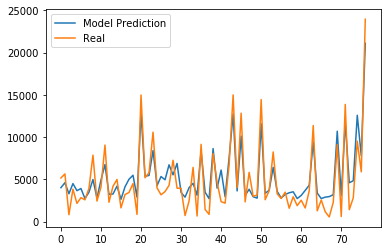

Prediction :  4004.97       real : 5152.0
Prediction :  4589.82       real : 5635.0
Prediction :  3286.44       real : 805.0
Prediction :  4489.5599999999995       real : 3829.0
Prediction :  3654.06       real : 2149.0
Prediction :  3904.71       real : 2821.0
Prediction :  2718.3       real : 2569.0
Prediction :  3470.25       real : 3913.0
Prediction :  4974.15       real : 7854.0
Prediction :  2785.14       real : 2422.0
Prediction :  4907.31       real : 4067.0
Prediction :  6745.41       real : 9051.0
Prediction :  3219.6       real : 2282.0
Prediction :  3253.02       real : 4172.0
Prediction :  4188.780000000001       real : 4977.0
Prediction :  2634.75       real : 1617.0
Prediction :  4105.23       real : 3192.0
Prediction :  5007.57       real : 3437.0
Prediction :  5475.45       real : 4494.0
Prediction :  2885.4       real : 840.0
Prediction :  12877.98       real : 14973.0
Prediction :  5358.48       real : 5180.0
Prediction :  5458.74       real : 5775.0
Prediction :  83

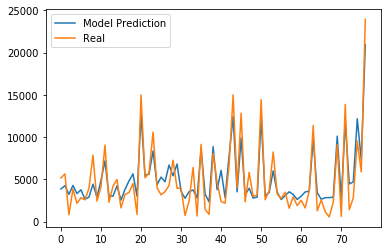

Prediction :  3854.58       real : 5152.0
Prediction :  4238.91       real : 5635.0
Prediction :  3219.6       real : 805.0
Prediction :  4272.33       real : 3829.0
Prediction :  3303.15       real : 2149.0
Prediction :  3754.32       real : 2821.0
Prediction :  2651.46       real : 2569.0
Prediction :  2885.4       real : 3913.0
Prediction :  4422.719999999999       real : 7854.0
Prediction :  2885.4       real : 2422.0
Prediction :  4857.18       real : 4067.0
Prediction :  7179.87       real : 9051.0
Prediction :  3002.37       real : 2282.0
Prediction :  3002.37       real : 4172.0
Prediction :  4222.2       real : 4977.0
Prediction :  2534.49       real : 1617.0
Prediction :  3804.45       real : 3192.0
Prediction :  4807.05       real : 3437.0
Prediction :  5642.55       real : 4494.0
Prediction :  3002.37       real : 840.0
Prediction :  12644.04       real : 14973.0
Prediction :  5442.03       real : 5180.0
Prediction :  5609.13       real : 5775.0
Prediction :  8349.57       

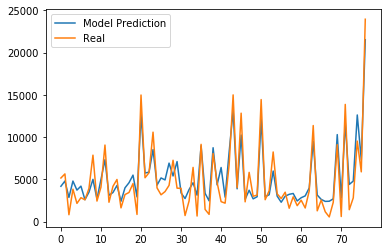

Prediction :  4172.07       real : 5152.0
Prediction :  4790.34       real : 5635.0
Prediction :  2851.98       real : 805.0
Prediction :  4790.34       real : 3829.0
Prediction :  3720.9       real : 2149.0
Prediction :  4188.780000000001       real : 2821.0
Prediction :  2584.62       real : 2569.0
Prediction :  3470.25       real : 3913.0
Prediction :  4990.86       real : 7854.0
Prediction :  2668.17       real : 2422.0
Prediction :  4974.15       real : 4067.0
Prediction :  7313.55       real : 9051.0
Prediction :  3102.63       real : 2282.0
Prediction :  3436.83       real : 4172.0
Prediction :  4272.33       real : 4977.0
Prediction :  2400.81       real : 1617.0
Prediction :  3988.26       real : 3192.0
Prediction :  4589.82       real : 3437.0
Prediction :  5492.16       real : 4494.0
Prediction :  2918.82       real : 840.0
Prediction :  12727.59       real : 14973.0
Prediction :  5742.81       real : 5180.0
Prediction :  5843.07       real : 5775.0
Prediction :  8516.67    

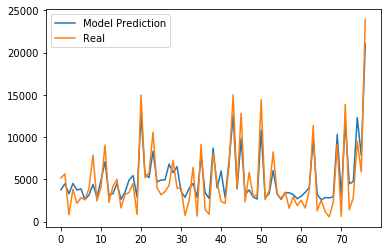

Prediction :  3754.32       real : 5152.0
Prediction :  4472.85       real : 5635.0
Prediction :  3286.44       real : 805.0
Prediction :  4506.27       real : 3829.0
Prediction :  3720.9       real : 2149.0
Prediction :  3871.29       real : 2821.0
Prediction :  2601.33       real : 2569.0
Prediction :  3136.05       real : 3913.0
Prediction :  4406.01       real : 7854.0
Prediction :  2868.69       real : 2422.0
Prediction :  4857.18       real : 4067.0
Prediction :  7079.61       real : 9051.0
Prediction :  3152.76       real : 2282.0
Prediction :  3319.86       real : 4172.0
Prediction :  4506.27       real : 4977.0
Prediction :  2618.04       real : 1617.0
Prediction :  3470.25       real : 3192.0
Prediction :  4890.6       real : 3437.0
Prediction :  5442.03       real : 4494.0
Prediction :  2918.82       real : 840.0
Prediction :  12677.46       real : 14973.0
Prediction :  5609.13       real : 5180.0
Prediction :  5191.38       real : 5775.0
Prediction :  8316.15       real : 1

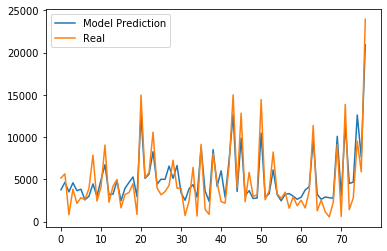

Prediction :  3754.32       real : 5152.0
Prediction :  4639.95       real : 5635.0
Prediction :  3503.67       real : 805.0
Prediction :  4589.82       real : 3829.0
Prediction :  3654.06       real : 2149.0
Prediction :  3821.16       real : 2821.0
Prediction :  2567.91       real : 2569.0
Prediction :  2985.66       real : 3913.0
Prediction :  4456.139999999999       real : 7854.0
Prediction :  2985.66       real : 2422.0
Prediction :  4907.31       real : 4067.0
Prediction :  6728.7       real : 9051.0
Prediction :  3186.18       real : 2282.0
Prediction :  3236.31       real : 4172.0
Prediction :  4807.05       real : 4977.0
Prediction :  2450.94       real : 1617.0
Prediction :  3938.13       real : 3192.0
Prediction :  4623.24       real : 3437.0
Prediction :  5274.93       real : 4494.0
Prediction :  2952.24       real : 840.0
Prediction :  12627.33       real : 14973.0
Prediction :  5107.83       real : 5180.0
Prediction :  5592.42       real : 5775.0
Prediction :  8266.02    

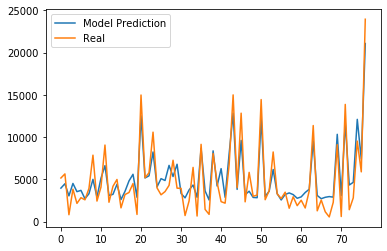

Prediction :  3954.84       real : 5152.0
Prediction :  4472.85       real : 5635.0
Prediction :  3035.79       real : 805.0
Prediction :  4506.27       real : 3829.0
Prediction :  3537.09       real : 2149.0
Prediction :  3687.48       real : 2821.0
Prediction :  2701.59       real : 2569.0
Prediction :  3286.44       real : 3913.0
Prediction :  4990.86       real : 7854.0
Prediction :  2902.11       real : 2422.0
Prediction :  5124.54       real : 4067.0
Prediction :  6611.73       real : 9051.0
Prediction :  3085.92       real : 2282.0
Prediction :  3219.6       real : 4172.0
Prediction :  4406.01       real : 4977.0
Prediction :  2601.33       real : 1617.0
Prediction :  3570.51       real : 3192.0
Prediction :  4807.05       real : 3437.0
Prediction :  5592.42       real : 4494.0
Prediction :  2868.69       real : 840.0
Prediction :  12510.36       real : 14973.0
Prediction :  5157.96       real : 5180.0
Prediction :  5408.61       real : 5775.0
Prediction :  8232.6       real : 1

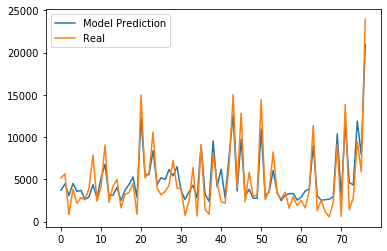

Prediction :  3687.48       real : 5152.0
Prediction :  4456.139999999999       real : 5635.0
Prediction :  3085.92       real : 805.0
Prediction :  4506.27       real : 3829.0
Prediction :  3570.51       real : 2149.0
Prediction :  3687.48       real : 2821.0
Prediction :  2618.04       real : 2569.0
Prediction :  2902.11       real : 3913.0
Prediction :  4372.59       real : 7854.0
Prediction :  2785.14       real : 2422.0
Prediction :  5091.12       real : 4067.0
Prediction :  6778.83       real : 9051.0
Prediction :  3102.63       real : 2282.0
Prediction :  3102.63       real : 4172.0
Prediction :  4055.1       real : 4977.0
Prediction :  2484.3599999999997       real : 1617.0
Prediction :  3704.19       real : 3192.0
Prediction :  4372.59       real : 3437.0
Prediction :  5274.93       real : 4494.0
Prediction :  2851.98       real : 840.0
Prediction :  12276.42       real : 14973.0
Prediction :  5542.29       real : 5180.0
Prediction :  5559.0       real : 5775.0
Prediction :  8

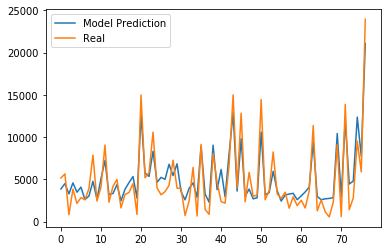

Prediction :  3854.58       real : 5152.0
Prediction :  4489.5599999999995       real : 5635.0
Prediction :  3269.73       real : 805.0
Prediction :  4573.110000000001       real : 3829.0
Prediction :  3470.25       real : 2149.0
Prediction :  4071.81       real : 2821.0
Prediction :  2601.33       real : 2569.0
Prediction :  3019.08       real : 3913.0
Prediction :  4756.92       real : 7854.0
Prediction :  2634.75       real : 2422.0
Prediction :  5057.7       real : 4067.0
Prediction :  7230.0       real : 9051.0
Prediction :  3169.47       real : 2282.0
Prediction :  3319.86       real : 4172.0
Prediction :  4372.59       real : 4977.0
Prediction :  2450.94       real : 1617.0
Prediction :  3821.16       real : 3192.0
Prediction :  4606.530000000001       real : 3437.0
Prediction :  5325.06       real : 4494.0
Prediction :  2768.43       real : 840.0
Prediction :  12627.33       real : 14973.0
Prediction :  5742.81       real : 5180.0
Prediction :  5341.77       real : 5775.0
Predi

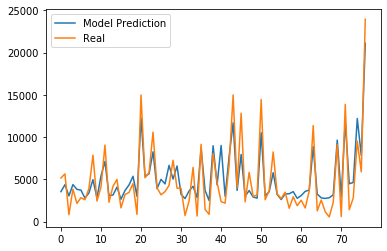

Prediction :  3537.09       real : 5152.0
Prediction :  4355.88       real : 5635.0
Prediction :  3035.79       real : 805.0
Prediction :  4372.59       real : 3829.0
Prediction :  3804.45       real : 2149.0
Prediction :  3720.9       real : 2821.0
Prediction :  2768.43       real : 2569.0
Prediction :  3386.7       real : 3913.0
Prediction :  4957.44       real : 7854.0
Prediction :  2801.85       real : 2422.0
Prediction :  5375.19       real : 4067.0
Prediction :  7113.03       real : 9051.0
Prediction :  3069.21       real : 2282.0
Prediction :  3136.05       real : 4172.0
Prediction :  4071.81       real : 4977.0
Prediction :  2634.75       real : 1617.0
Prediction :  3670.77       real : 3192.0
Prediction :  4322.46       real : 3437.0
Prediction :  5358.48       real : 4494.0
Prediction :  2985.66       real : 840.0
Prediction :  12259.71       real : 14973.0
Prediction :  5358.48       real : 5180.0
Prediction :  5642.55       real : 5775.0
Prediction :  8249.310000000001     

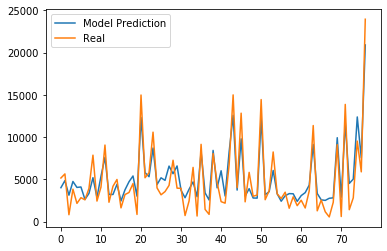

Prediction :  4004.97       real : 5152.0
Prediction :  4840.47       real : 5635.0
Prediction :  3119.34       real : 805.0
Prediction :  4740.21       real : 3829.0
Prediction :  4038.39       real : 2149.0
Prediction :  4088.52       real : 2821.0
Prediction :  2618.04       real : 2569.0
Prediction :  3319.86       real : 3913.0
Prediction :  5191.38       real : 7854.0
Prediction :  2851.98       real : 2422.0
Prediction :  5358.48       real : 4067.0
Prediction :  7597.62       real : 9051.0
Prediction :  3202.89       real : 2282.0
Prediction :  3202.89       real : 4172.0
Prediction :  4406.01       real : 4977.0
Prediction :  2434.23       real : 1617.0
Prediction :  3754.32       real : 3192.0
Prediction :  4706.79       real : 3437.0
Prediction :  5391.9       real : 4494.0
Prediction :  3002.37       real : 840.0
Prediction :  12309.84       real : 14973.0
Prediction :  5792.94       real : 5180.0
Prediction :  5308.35       real : 5775.0
Prediction :  8700.48       real : 

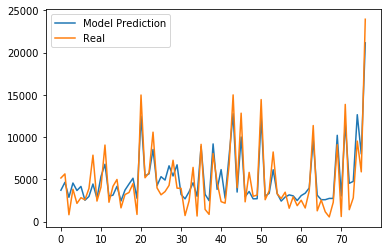

Prediction :  3704.19       real : 5152.0
Prediction :  4639.95       real : 5635.0
Prediction :  2868.69       real : 805.0
Prediction :  4556.4       real : 3829.0
Prediction :  3670.77       real : 2149.0
Prediction :  4155.360000000001       real : 2821.0
Prediction :  2517.7799999999997       real : 2569.0
Prediction :  2968.95       real : 3913.0
Prediction :  4439.43       real : 7854.0
Prediction :  2751.72       real : 2422.0
Prediction :  5325.06       real : 4067.0
Prediction :  6778.83       real : 9051.0
Prediction :  3002.37       real : 2282.0
Prediction :  3119.34       real : 4172.0
Prediction :  4172.07       real : 4977.0
Prediction :  2434.23       real : 1617.0
Prediction :  3720.9       real : 3192.0
Prediction :  4439.43       real : 3437.0
Prediction :  5124.54       real : 4494.0
Prediction :  2751.72       real : 840.0
Prediction :  12476.94       real : 14973.0
Prediction :  5408.61       real : 5180.0
Prediction :  5642.55       real : 5775.0
Prediction :  8

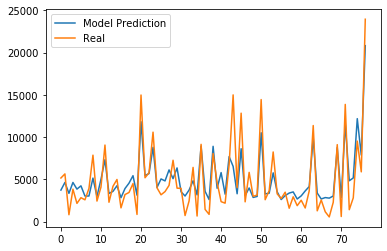

Prediction :  3720.9       real : 5152.0
Prediction :  4623.24       real : 5635.0
Prediction :  3336.57       real : 805.0
Prediction :  4623.24       real : 3829.0
Prediction :  3837.87       real : 2149.0
Prediction :  4222.2       real : 2821.0
Prediction :  3019.08       real : 2569.0
Prediction :  3019.08       real : 3913.0
Prediction :  5141.25       real : 7854.0
Prediction :  2968.95       real : 2422.0
Prediction :  4990.86       real : 4067.0
Prediction :  7313.55       real : 9051.0
Prediction :  3319.86       real : 2282.0
Prediction :  3570.51       real : 4172.0
Prediction :  4238.91       real : 4977.0
Prediction :  2818.56       real : 1617.0
Prediction :  3904.71       real : 3192.0
Prediction :  4539.6900000000005       real : 3437.0
Prediction :  5425.32       real : 4494.0
Prediction :  3119.34       real : 840.0
Prediction :  11808.54       real : 14973.0
Prediction :  5442.03       real : 5180.0
Prediction :  5675.97       real : 5775.0
Prediction :  8784.03    

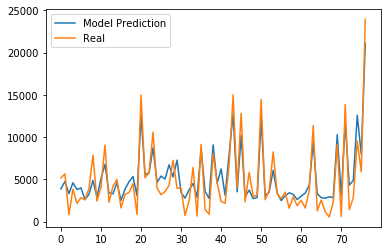

Prediction :  3871.29       real : 5152.0
Prediction :  4740.21       real : 5635.0
Prediction :  3303.15       real : 805.0
Prediction :  4589.82       real : 3829.0
Prediction :  3787.74       real : 2149.0
Prediction :  3988.26       real : 2821.0
Prediction :  2601.33       real : 2569.0
Prediction :  3219.6       real : 3913.0
Prediction :  4857.18       real : 7854.0
Prediction :  2918.82       real : 2422.0
Prediction :  5057.7       real : 4067.0
Prediction :  6778.83       real : 9051.0
Prediction :  3386.7       real : 2282.0
Prediction :  3286.44       real : 4172.0
Prediction :  4589.82       real : 4977.0
Prediction :  2501.0699999999997       real : 1617.0
Prediction :  3821.16       real : 3192.0
Prediction :  4706.79       real : 3437.0
Prediction :  5325.06       real : 4494.0
Prediction :  3069.21       real : 840.0
Prediction :  12510.36       real : 14973.0
Prediction :  5575.71       real : 5180.0
Prediction :  5742.81       real : 5775.0
Prediction :  8717.1899999

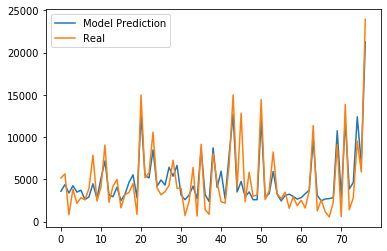

Prediction :  3587.22       real : 5152.0
Prediction :  4372.59       real : 5635.0
Prediction :  3369.99       real : 805.0
Prediction :  4238.91       real : 3829.0
Prediction :  3486.96       real : 2149.0
Prediction :  3704.19       real : 2821.0
Prediction :  2601.33       real : 2569.0
Prediction :  2918.82       real : 3913.0
Prediction :  4472.85       real : 7854.0
Prediction :  2718.3       real : 2422.0
Prediction :  5091.12       real : 4067.0
Prediction :  7179.87       real : 9051.0
Prediction :  3152.76       real : 2282.0
Prediction :  2935.53       real : 4172.0
Prediction :  4071.81       real : 4977.0
Prediction :  2467.65       real : 1617.0
Prediction :  3236.31       real : 3192.0
Prediction :  4623.24       real : 3437.0
Prediction :  5525.58       real : 4494.0
Prediction :  2818.56       real : 840.0
Prediction :  12627.33       real : 14973.0
Prediction :  5458.74       real : 5180.0
Prediction :  5157.96       real : 5775.0
Prediction :  8483.25       real : 

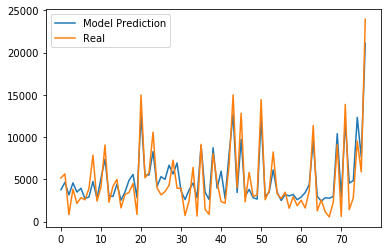

Prediction :  3754.32       real : 5152.0
Prediction :  4639.95       real : 5635.0
Prediction :  3152.76       real : 805.0
Prediction :  4573.110000000001       real : 3829.0
Prediction :  3486.96       real : 2149.0
Prediction :  3938.13       real : 2821.0
Prediction :  2718.3       real : 2569.0
Prediction :  2902.11       real : 3913.0
Prediction :  4740.21       real : 7854.0
Prediction :  2751.72       real : 2422.0
Prediction :  5107.83       real : 4067.0
Prediction :  7380.39       real : 9051.0
Prediction :  3069.21       real : 2282.0
Prediction :  2968.95       real : 4172.0
Prediction :  4422.719999999999       real : 4977.0
Prediction :  2517.7799999999997       real : 1617.0
Prediction :  3486.96       real : 3192.0
Prediction :  4873.89       real : 3437.0
Prediction :  5575.71       real : 4494.0
Prediction :  2835.27       real : 840.0
Prediction :  12644.04       real : 14973.0
Prediction :  5492.16       real : 5180.0
Prediction :  5508.87       real : 5775.0
Pred

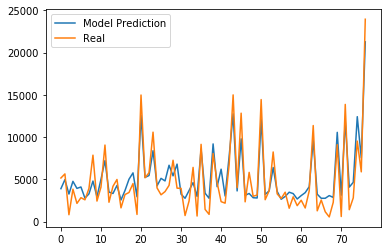

Prediction :  3888.0       real : 5152.0
Prediction :  4957.44       real : 5635.0
Prediction :  3253.02       real : 805.0
Prediction :  4756.92       real : 3829.0
Prediction :  3921.42       real : 2149.0
Prediction :  4088.52       real : 2821.0
Prediction :  2768.43       real : 2569.0
Prediction :  3269.73       real : 3913.0
Prediction :  4790.34       real : 7854.0
Prediction :  2935.53       real : 2422.0
Prediction :  4990.86       real : 4067.0
Prediction :  7213.29       real : 9051.0
Prediction :  3486.96       real : 2282.0
Prediction :  3319.86       real : 4172.0
Prediction :  4272.33       real : 4977.0
Prediction :  2551.2       real : 1617.0
Prediction :  3670.77       real : 3192.0
Prediction :  5007.57       real : 3437.0
Prediction :  5759.52       real : 4494.0
Prediction :  2935.53       real : 840.0
Prediction :  12577.2       real : 14973.0
Prediction :  5224.8       real : 5180.0
Prediction :  5442.03       real : 5775.0
Prediction :  8382.99       real : 105

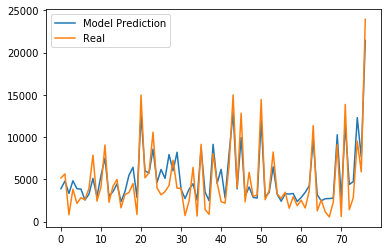

Prediction :  3888.0       real : 5152.0
Prediction :  4790.34       real : 5635.0
Prediction :  3319.86       real : 805.0
Prediction :  4823.76       real : 3829.0
Prediction :  3888.0       real : 2149.0
Prediction :  3837.87       real : 2821.0
Prediction :  2551.2       real : 2569.0
Prediction :  3236.31       real : 3913.0
Prediction :  5107.83       real : 7854.0
Prediction :  2952.24       real : 2422.0
Prediction :  5425.32       real : 4067.0
Prediction :  7514.07       real : 9051.0
Prediction :  3002.37       real : 2282.0
Prediction :  3537.09       real : 4172.0
Prediction :  4456.139999999999       real : 4977.0
Prediction :  2350.6800000000003       real : 1617.0
Prediction :  3553.8       real : 3192.0
Prediction :  5492.16       real : 3437.0
Prediction :  6427.92       real : 4494.0
Prediction :  2835.27       real : 840.0
Prediction :  12627.33       real : 14973.0
Prediction :  5993.46       real : 5180.0
Prediction :  5742.81       real : 5775.0
Prediction :  856

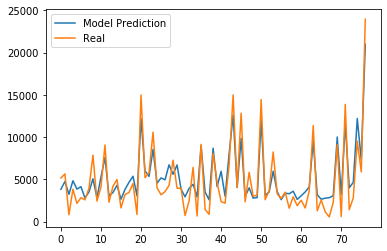

Prediction :  3821.16       real : 5152.0
Prediction :  4740.21       real : 5635.0
Prediction :  3219.6       real : 805.0
Prediction :  4823.76       real : 3829.0
Prediction :  3837.87       real : 2149.0
Prediction :  4121.9400000000005       real : 2821.0
Prediction :  2785.14       real : 2569.0
Prediction :  3486.96       real : 3913.0
Prediction :  5057.7       real : 7854.0
Prediction :  2818.56       real : 2422.0
Prediction :  5258.22       real : 4067.0
Prediction :  7580.91       real : 9051.0
Prediction :  3052.5       real : 2282.0
Prediction :  3436.83       real : 4172.0
Prediction :  4289.04       real : 4977.0
Prediction :  2634.75       real : 1617.0
Prediction :  3804.45       real : 3192.0
Prediction :  4639.95       real : 3437.0
Prediction :  5358.48       real : 4494.0
Prediction :  3035.79       real : 840.0
Prediction :  12176.16       real : 14973.0
Prediction :  5993.46       real : 5180.0
Prediction :  5341.77       real : 5775.0
Prediction :  8533.3800000

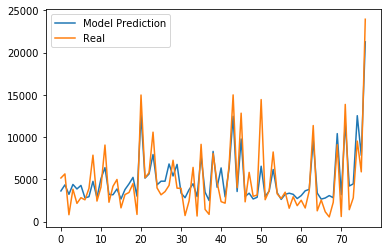

Prediction :  3620.64       real : 5152.0
Prediction :  4339.17       real : 5635.0
Prediction :  3219.6       real : 805.0
Prediction :  4389.3       real : 3829.0
Prediction :  3854.58       real : 2149.0
Prediction :  4272.33       real : 2821.0
Prediction :  2801.85       real : 2569.0
Prediction :  2935.53       real : 3913.0
Prediction :  4756.92       real : 7854.0
Prediction :  2835.27       real : 2422.0
Prediction :  5074.41       real : 4067.0
Prediction :  6377.79       real : 9051.0
Prediction :  3202.89       real : 2282.0
Prediction :  3169.47       real : 4172.0
Prediction :  3854.58       real : 4977.0
Prediction :  2668.17       real : 1617.0
Prediction :  3787.74       real : 3192.0
Prediction :  4456.139999999999       real : 3437.0
Prediction :  5224.8       real : 4494.0
Prediction :  3002.37       real : 840.0
Prediction :  12627.33       real : 14973.0
Prediction :  5141.25       real : 5180.0
Prediction :  5625.84       real : 5775.0
Prediction :  7931.82      

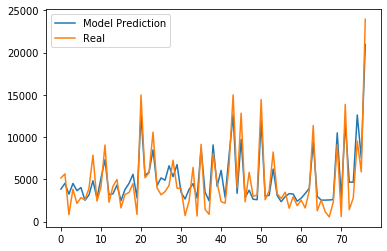

Prediction :  3837.87       real : 5152.0
Prediction :  4522.98       real : 5635.0
Prediction :  3236.31       real : 805.0
Prediction :  4506.27       real : 3829.0
Prediction :  3654.06       real : 2149.0
Prediction :  4021.68       real : 2821.0
Prediction :  2517.7799999999997       real : 2569.0
Prediction :  3136.05       real : 3913.0
Prediction :  4823.76       real : 7854.0
Prediction :  2768.43       real : 2422.0
Prediction :  5107.83       real : 4067.0
Prediction :  7313.55       real : 9051.0
Prediction :  3169.47       real : 2282.0
Prediction :  3286.44       real : 4172.0
Prediction :  4322.46       real : 4977.0
Prediction :  2467.65       real : 1617.0
Prediction :  3787.74       real : 3192.0
Prediction :  4506.27       real : 3437.0
Prediction :  5592.42       real : 4494.0
Prediction :  2801.85       real : 840.0
Prediction :  12644.04       real : 14973.0
Prediction :  5442.03       real : 5180.0
Prediction :  5843.07       real : 5775.0
Prediction :  8483.25  

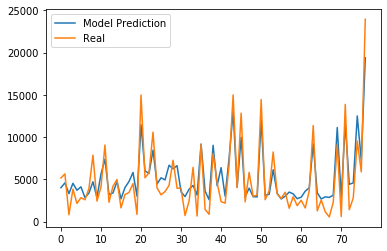

Prediction :  4004.97       real : 5152.0
Prediction :  4573.110000000001       real : 5635.0
Prediction :  3303.15       real : 805.0
Prediction :  4522.98       real : 3829.0
Prediction :  3704.19       real : 2149.0
Prediction :  4105.23       real : 2821.0
Prediction :  2835.27       real : 2569.0
Prediction :  3369.99       real : 3913.0
Prediction :  4706.79       real : 7854.0
Prediction :  2835.27       real : 2422.0
Prediction :  5609.13       real : 4067.0
Prediction :  7380.39       real : 9051.0
Prediction :  3186.18       real : 2282.0
Prediction :  3386.7       real : 4172.0
Prediction :  4723.5       real : 4977.0
Prediction :  2684.88       real : 1617.0
Prediction :  4021.68       real : 3192.0
Prediction :  4740.21       real : 3437.0
Prediction :  5809.65       real : 4494.0
Prediction :  3002.37       real : 840.0
Prediction :  11457.63       real : 14973.0
Prediction :  5993.46       real : 5180.0
Prediction :  5692.68       real : 5775.0
Prediction :  8449.83     

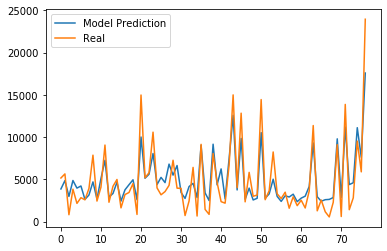

Prediction :  3854.58       real : 5152.0
Prediction :  4840.47       real : 5635.0
Prediction :  2968.95       real : 805.0
Prediction :  4857.18       real : 3829.0
Prediction :  3954.84       real : 2149.0
Prediction :  4205.49       real : 2821.0
Prediction :  2618.04       real : 2569.0
Prediction :  3136.05       real : 3913.0
Prediction :  4690.08       real : 7854.0
Prediction :  2668.17       real : 2422.0
Prediction :  5091.12       real : 4067.0
Prediction :  7246.71       real : 9051.0
Prediction :  2885.4       real : 2282.0
Prediction :  3319.86       real : 4172.0
Prediction :  4656.66       real : 4977.0
Prediction :  2417.52       real : 1617.0
Prediction :  3754.32       real : 3192.0
Prediction :  4355.88       real : 3437.0
Prediction :  4940.73       real : 4494.0
Prediction :  2584.62       real : 840.0
Prediction :  10003.86       real : 14973.0
Prediction :  5124.54       real : 5180.0
Prediction :  5592.42       real : 5775.0
Prediction :  8048.79       real : 

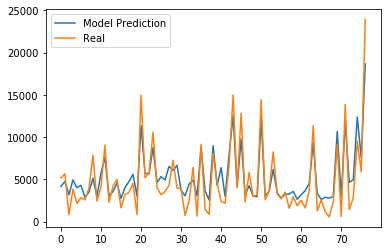

Prediction :  4155.360000000001       real : 5152.0
Prediction :  4740.21       real : 5635.0
Prediction :  3169.47       real : 805.0
Prediction :  4924.02       real : 3829.0
Prediction :  4004.97       real : 2149.0
Prediction :  4289.04       real : 2821.0
Prediction :  2868.69       real : 2569.0
Prediction :  3486.96       real : 3913.0
Prediction :  5124.54       real : 7854.0
Prediction :  2952.24       real : 2422.0
Prediction :  5742.81       real : 4067.0
Prediction :  7580.91       real : 9051.0
Prediction :  3069.21       real : 2282.0
Prediction :  3537.09       real : 4172.0
Prediction :  4556.4       real : 4977.0
Prediction :  2718.3       real : 1617.0
Prediction :  4021.68       real : 3192.0
Prediction :  4740.21       real : 3437.0
Prediction :  5592.42       real : 4494.0
Prediction :  3002.37       real : 840.0
Prediction :  11340.66       real : 14973.0
Prediction :  5726.1       real : 5180.0
Prediction :  5625.84       real : 5775.0
Prediction :  8733.9       

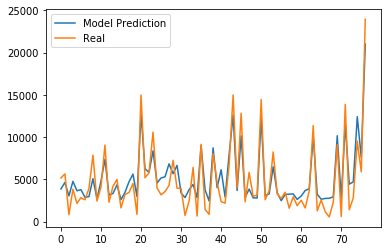

Prediction :  3854.58       real : 5152.0
Prediction :  4623.24       real : 5635.0
Prediction :  3035.79       real : 805.0
Prediction :  4756.92       real : 3829.0
Prediction :  3637.35       real : 2149.0
Prediction :  3771.03       real : 2821.0
Prediction :  2868.69       real : 2569.0
Prediction :  2952.24       real : 3913.0
Prediction :  5074.41       real : 7854.0
Prediction :  2684.88       real : 2422.0
Prediction :  4773.63       real : 4067.0
Prediction :  7363.68       real : 9051.0
Prediction :  3136.05       real : 2282.0
Prediction :  3319.86       real : 4172.0
Prediction :  4339.17       real : 4977.0
Prediction :  2584.62       real : 1617.0
Prediction :  3453.54       real : 3192.0
Prediction :  4706.79       real : 3437.0
Prediction :  5609.13       real : 4494.0
Prediction :  2952.24       real : 840.0
Prediction :  12777.72       real : 14973.0
Prediction :  6244.11       real : 5180.0
Prediction :  5826.36       real : 5775.0
Prediction :  8366.279999999999   

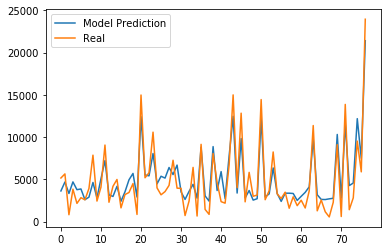

Prediction :  3620.64       real : 5152.0
Prediction :  4673.37       real : 5635.0
Prediction :  3319.86       real : 805.0
Prediction :  4690.08       real : 3829.0
Prediction :  3771.03       real : 2149.0
Prediction :  3854.58       real : 2821.0
Prediction :  2584.62       real : 2569.0
Prediction :  2885.4       real : 3913.0
Prediction :  4623.24       real : 7854.0
Prediction :  2801.85       real : 2422.0
Prediction :  5057.7       real : 4067.0
Prediction :  7213.29       real : 9051.0
Prediction :  3152.76       real : 2282.0
Prediction :  2968.95       real : 4172.0
Prediction :  4172.07       real : 4977.0
Prediction :  2400.81       real : 1617.0
Prediction :  3520.38       real : 3192.0
Prediction :  4940.73       real : 3437.0
Prediction :  5692.68       real : 4494.0
Prediction :  2902.11       real : 840.0
Prediction :  12410.1       real : 14973.0
Prediction :  5508.87       real : 5180.0
Prediction :  5408.61       real : 5775.0
Prediction :  8048.79       real : 10

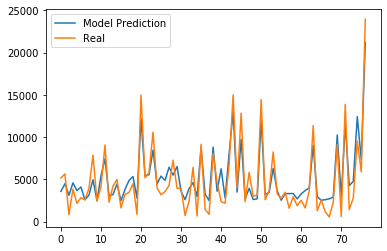

Prediction :  3570.51       real : 5152.0
Prediction :  4472.85       real : 5635.0
Prediction :  3102.63       real : 805.0
Prediction :  4573.110000000001       real : 3829.0
Prediction :  3654.06       real : 2149.0
Prediction :  4088.52       real : 2821.0
Prediction :  2567.91       real : 2569.0
Prediction :  3119.34       real : 3913.0
Prediction :  4940.73       real : 7854.0
Prediction :  2484.3599999999997       real : 2422.0
Prediction :  5408.61       real : 4067.0
Prediction :  7430.52       real : 9051.0
Prediction :  3069.21       real : 2282.0
Prediction :  3186.18       real : 4172.0
Prediction :  4439.43       real : 4977.0
Prediction :  2450.94       real : 1617.0
Prediction :  3804.45       real : 3192.0
Prediction :  4857.18       real : 3437.0
Prediction :  5325.06       real : 4494.0
Prediction :  2768.43       real : 840.0
Prediction :  12176.16       real : 14973.0
Prediction :  5425.32       real : 5180.0
Prediction :  5542.29       real : 5775.0
Prediction : 

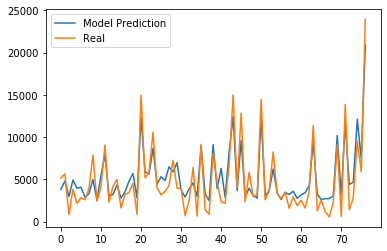

Prediction :  3804.45       real : 5152.0
Prediction :  4807.05       real : 5635.0
Prediction :  2952.24       real : 805.0
Prediction :  4907.31       real : 3829.0
Prediction :  3954.84       real : 2149.0
Prediction :  4055.1       real : 2821.0
Prediction :  2885.4       real : 2569.0
Prediction :  3286.44       real : 3913.0
Prediction :  4974.15       real : 7854.0
Prediction :  2501.0699999999997       real : 2422.0
Prediction :  5492.16       real : 4067.0
Prediction :  7898.4       real : 9051.0
Prediction :  3069.21       real : 2282.0
Prediction :  3186.18       real : 4172.0
Prediction :  4322.46       real : 4977.0
Prediction :  2768.43       real : 1617.0
Prediction :  3520.38       real : 3192.0
Prediction :  4773.63       real : 3437.0
Prediction :  5692.68       real : 4494.0
Prediction :  2785.14       real : 840.0
Prediction :  12343.26       real : 14973.0
Prediction :  5909.91       real : 5180.0
Prediction :  5609.13       real : 5775.0
Prediction :  8683.77     

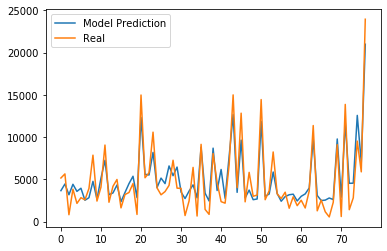

Prediction :  3654.06       real : 5152.0
Prediction :  4439.43       real : 5635.0
Prediction :  3169.47       real : 805.0
Prediction :  4406.01       real : 3829.0
Prediction :  3570.51       real : 2149.0
Prediction :  3938.13       real : 2821.0
Prediction :  2517.7799999999997       real : 2569.0
Prediction :  2818.56       real : 3913.0
Prediction :  4756.92       real : 7854.0
Prediction :  2651.46       real : 2422.0
Prediction :  5124.54       real : 4067.0
Prediction :  7246.71       real : 9051.0
Prediction :  3169.47       real : 2282.0
Prediction :  3386.7       real : 4172.0
Prediction :  4322.46       real : 4977.0
Prediction :  2350.6800000000003       real : 1617.0
Prediction :  3436.83       real : 3192.0
Prediction :  4489.5599999999995       real : 3437.0
Prediction :  5358.48       real : 4494.0
Prediction :  2835.27       real : 840.0
Prediction :  12309.84       real : 14973.0
Prediction :  5592.42       real : 5180.0
Prediction :  5508.87       real : 5775.0
Pr

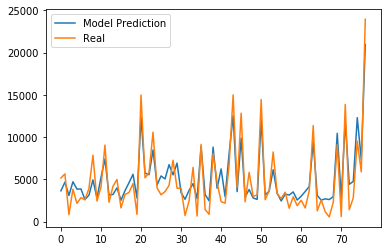

Prediction :  3637.35       real : 5152.0
Prediction :  4656.66       real : 5635.0
Prediction :  3085.92       real : 805.0
Prediction :  4706.79       real : 3829.0
Prediction :  3837.87       real : 2149.0
Prediction :  3854.58       real : 2821.0
Prediction :  2601.33       real : 2569.0
Prediction :  3119.34       real : 3913.0
Prediction :  4924.02       real : 7854.0
Prediction :  2768.43       real : 2422.0
Prediction :  5191.38       real : 4067.0
Prediction :  7397.1       real : 9051.0
Prediction :  3136.05       real : 2282.0
Prediction :  3202.89       real : 4172.0
Prediction :  3988.26       real : 4977.0
Prediction :  2517.7799999999997       real : 1617.0
Prediction :  3654.06       real : 3192.0
Prediction :  4589.82       real : 3437.0
Prediction :  5592.42       real : 4494.0
Prediction :  2785.14       real : 840.0
Prediction :  12359.97       real : 14973.0
Prediction :  5742.81       real : 5180.0
Prediction :  5542.29       real : 5775.0
Prediction :  8466.54   

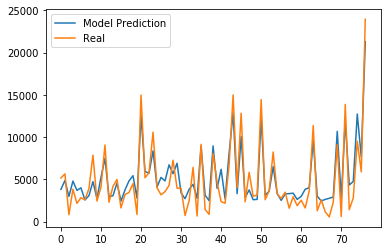

Prediction :  3804.45       real : 5152.0
Prediction :  4857.18       real : 5635.0
Prediction :  2968.95       real : 805.0
Prediction :  4790.34       real : 3829.0
Prediction :  3687.48       real : 2149.0
Prediction :  3988.26       real : 2821.0
Prediction :  2551.2       real : 2569.0
Prediction :  3069.21       real : 3913.0
Prediction :  4723.5       real : 7854.0
Prediction :  2718.3       real : 2422.0
Prediction :  5224.8       real : 4067.0
Prediction :  7480.65       real : 9051.0
Prediction :  2952.24       real : 2282.0
Prediction :  3052.5       real : 4172.0
Prediction :  4556.4       real : 4977.0
Prediction :  2417.52       real : 1617.0
Prediction :  3737.61       real : 3192.0
Prediction :  4807.05       real : 3437.0
Prediction :  5425.32       real : 4494.0
Prediction :  2768.43       real : 840.0
Prediction :  12577.2       real : 14973.0
Prediction :  5926.62       real : 5180.0
Prediction :  5709.39       real : 5775.0
Prediction :  8366.279999999999       rea

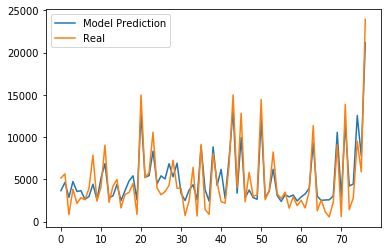

Prediction :  3654.06       real : 5152.0
Prediction :  4623.24       real : 5635.0
Prediction :  2868.69       real : 805.0
Prediction :  4740.21       real : 3829.0
Prediction :  3553.8       real : 2149.0
Prediction :  3654.06       real : 2821.0
Prediction :  2618.04       real : 2569.0
Prediction :  2968.95       real : 3913.0
Prediction :  4422.719999999999       real : 7854.0
Prediction :  2567.91       real : 2422.0
Prediction :  5107.83       real : 4067.0
Prediction :  6862.38       real : 9051.0
Prediction :  2818.56       real : 2282.0
Prediction :  3035.79       real : 4172.0
Prediction :  4389.3       real : 4977.0
Prediction :  2467.65       real : 1617.0
Prediction :  3654.06       real : 3192.0
Prediction :  4790.34       real : 3437.0
Prediction :  5408.61       real : 4494.0
Prediction :  2551.2       real : 840.0
Prediction :  12761.01       real : 14973.0
Prediction :  5241.51       real : 5180.0
Prediction :  5425.32       real : 5775.0
Prediction :  8332.86      

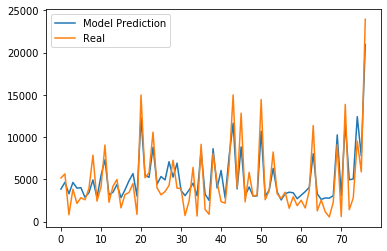

Prediction :  3837.87       real : 5152.0
Prediction :  4639.95       real : 5635.0
Prediction :  3286.44       real : 805.0
Prediction :  4623.24       real : 3829.0
Prediction :  3954.84       real : 2149.0
Prediction :  4004.97       real : 2821.0
Prediction :  2868.69       real : 2569.0
Prediction :  3420.12       real : 3913.0
Prediction :  4924.02       real : 7854.0
Prediction :  2851.98       real : 2422.0
Prediction :  5425.32       real : 4067.0
Prediction :  7313.55       real : 9051.0
Prediction :  3152.76       real : 2282.0
Prediction :  3470.25       real : 4172.0
Prediction :  4389.3       real : 4977.0
Prediction :  2818.56       real : 1617.0
Prediction :  3754.32       real : 3192.0
Prediction :  4823.76       real : 3437.0
Prediction :  5675.97       real : 4494.0
Prediction :  3019.08       real : 840.0
Prediction :  12293.13       real : 14973.0
Prediction :  5508.87       real : 5180.0
Prediction :  5224.8       real : 5775.0
Prediction :  8800.74       real : 1

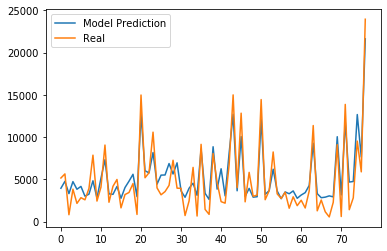

Prediction :  3938.13       real : 5152.0
Prediction :  4756.92       real : 5635.0
Prediction :  3303.15       real : 805.0
Prediction :  4723.5       real : 3829.0
Prediction :  3821.16       real : 2149.0
Prediction :  4155.360000000001       real : 2821.0
Prediction :  3002.37       real : 2569.0
Prediction :  3236.31       real : 3913.0
Prediction :  4823.76       real : 7854.0
Prediction :  2785.14       real : 2422.0
Prediction :  5124.54       real : 4067.0
Prediction :  7313.55       real : 9051.0
Prediction :  3269.73       real : 2282.0
Prediction :  3219.6       real : 4172.0
Prediction :  4155.360000000001       real : 4977.0
Prediction :  2751.72       real : 1617.0
Prediction :  4021.68       real : 3192.0
Prediction :  4773.63       real : 3437.0
Prediction :  5592.42       real : 4494.0
Prediction :  2952.24       real : 840.0
Prediction :  12744.3       real : 14973.0
Prediction :  6010.17       real : 5180.0
Prediction :  5759.52       real : 5775.0
Prediction :  816

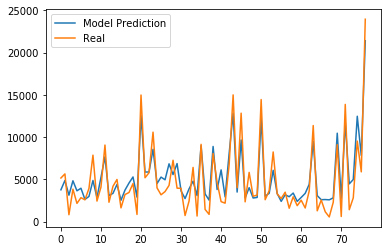

Prediction :  3754.32       real : 5152.0
Prediction :  4857.18       real : 5635.0
Prediction :  3119.34       real : 805.0
Prediction :  4823.76       real : 3829.0
Prediction :  3637.35       real : 2149.0
Prediction :  3938.13       real : 2821.0
Prediction :  2618.04       real : 2569.0
Prediction :  2968.95       real : 3913.0
Prediction :  4857.18       real : 7854.0
Prediction :  2835.27       real : 2422.0
Prediction :  5224.8       real : 4067.0
Prediction :  7664.46       real : 9051.0
Prediction :  3069.21       real : 2282.0
Prediction :  3336.57       real : 4172.0
Prediction :  4389.3       real : 4977.0
Prediction :  2517.7799999999997       real : 1617.0
Prediction :  3720.9       real : 3192.0
Prediction :  4556.4       real : 3437.0
Prediction :  5274.93       real : 4494.0
Prediction :  2885.4       real : 840.0
Prediction :  12543.78       real : 14973.0
Prediction :  5859.78       real : 5180.0
Prediction :  5859.78       real : 5775.0
Prediction :  8550.09       

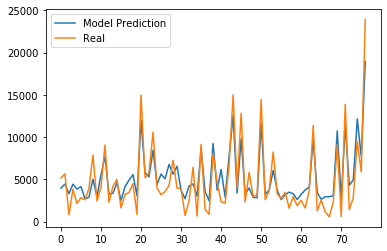

Prediction :  3954.84       real : 5152.0
Prediction :  4439.43       real : 5635.0
Prediction :  3286.44       real : 805.0
Prediction :  4422.719999999999       real : 3829.0
Prediction :  3837.87       real : 2149.0
Prediction :  4138.65       real : 2821.0
Prediction :  2701.59       real : 2569.0
Prediction :  2868.69       real : 3913.0
Prediction :  5007.57       real : 7854.0
Prediction :  2935.53       real : 2422.0
Prediction :  5542.29       real : 4067.0
Prediction :  7714.59       real : 9051.0
Prediction :  3219.6       real : 2282.0
Prediction :  3353.28       real : 4172.0
Prediction :  4606.530000000001       real : 4977.0
Prediction :  2501.0699999999997       real : 1617.0
Prediction :  4121.9400000000005       real : 3192.0
Prediction :  4890.6       real : 3437.0
Prediction :  5559.0       real : 4494.0
Prediction :  3069.21       real : 840.0
Prediction :  11958.93       real : 14973.0
Prediction :  5776.23       real : 5180.0
Prediction :  5291.64       real : 57

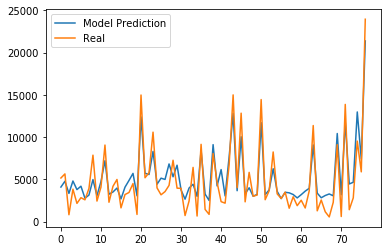

Prediction :  4080.075       real : 5152.0
Prediction :  4763.75       real : 5635.0
Prediction :  3329.7       real : 805.0
Prediction :  4797.1       real : 3829.0
Prediction :  3779.925       real : 2149.0
Prediction :  4180.125       real : 2821.0
Prediction :  2762.75       real : 2569.0
Prediction :  3129.6       real : 3913.0
Prediction :  4963.85       real : 7854.0
Prediction :  3062.9       real : 2422.0
Prediction :  4730.4       real : 4067.0
Prediction :  7198.3       real : 9051.0
Prediction :  3229.65       real : 2282.0
Prediction :  3496.45       real : 4172.0
Prediction :  3963.35       real : 4977.0
Prediction :  2679.375       real : 1617.0
Prediction :  4063.4       real : 3192.0
Prediction :  4863.8       real : 3437.0
Prediction :  5697.55       real : 4494.0
Prediction :  3046.225       real : 840.0
Prediction :  12384.225       real : 14973.0
Prediction :  5714.225       real : 5180.0
Prediction :  5564.15       real : 5775.0
Prediction :  8298.85       real : 

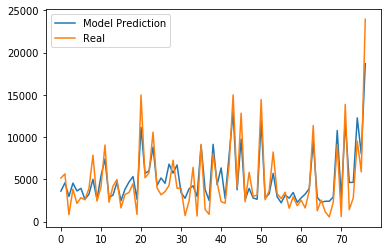

Prediction :  3603.93       real : 5152.0
Prediction :  4573.110000000001       real : 5635.0
Prediction :  2968.95       real : 805.0
Prediction :  4539.6900000000005       real : 3829.0
Prediction :  3620.64       real : 2149.0
Prediction :  3921.42       real : 2821.0
Prediction :  2634.75       real : 2569.0
Prediction :  3236.31       real : 3913.0
Prediction :  4990.86       real : 7854.0
Prediction :  2634.75       real : 2422.0
Prediction :  5391.9       real : 4067.0
Prediction :  7397.1       real : 9051.0
Prediction :  2868.69       real : 2282.0
Prediction :  3119.34       real : 4172.0
Prediction :  4639.95       real : 4977.0
Prediction :  2467.65       real : 1617.0
Prediction :  3821.16       real : 3192.0
Prediction :  4673.37       real : 3437.0
Prediction :  5325.06       real : 4494.0
Prediction :  2634.75       real : 840.0
Prediction :  11140.14       real : 14973.0
Prediction :  5709.39       real : 5180.0
Prediction :  5993.46       real : 5775.0
Prediction :  8

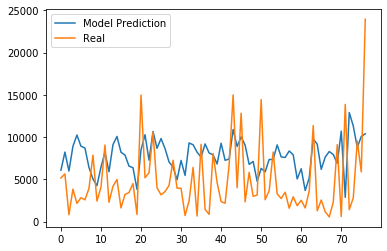

Prediction :  6077.01       real : 5152.0
Prediction :  8215.89       real : 5635.0
Prediction :  5976.75       real : 805.0
Prediction :  8901.0       real : 3829.0
Prediction :  10237.8       real : 2149.0
Prediction :  8917.71       real : 2821.0
Prediction :  8700.48       real : 2569.0
Prediction :  6411.21       real : 3913.0
Prediction :  5040.99       real : 7854.0
Prediction :  4238.91       real : 2422.0
Prediction :  6444.63       real : 4067.0
Prediction :  8182.47       real : 9051.0
Prediction :  5893.2       real : 2282.0
Prediction :  9101.52       real : 4172.0
Prediction :  10070.7       real : 4977.0
Prediction :  8199.18       real : 1617.0
Prediction :  7864.98       real : 3192.0
Prediction :  6561.6       real : 3437.0
Prediction :  6361.08       real : 4494.0
Prediction :  3804.45       real : 840.0
Prediction :  8483.25       real : 14973.0
Prediction :  10271.22       real : 5180.0
Prediction :  7263.42       real : 5775.0
Prediction :  10655.55       real : 1

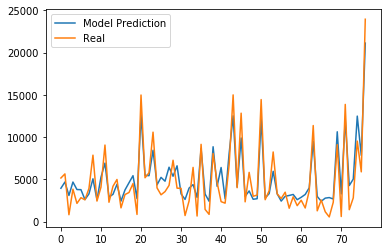

Prediction :  3938.13       real : 5152.0
Prediction :  4673.37       real : 5635.0
Prediction :  3085.92       real : 805.0
Prediction :  4673.37       real : 3829.0
Prediction :  3787.74       real : 2149.0
Prediction :  3771.03       real : 2821.0
Prediction :  2601.33       real : 2569.0
Prediction :  3269.73       real : 3913.0
Prediction :  5057.7       real : 7854.0
Prediction :  2567.91       real : 2422.0
Prediction :  5241.51       real : 4067.0
Prediction :  6912.51       real : 9051.0
Prediction :  2902.11       real : 2282.0
Prediction :  3219.6       real : 4172.0
Prediction :  4406.01       real : 4977.0
Prediction :  2417.52       real : 1617.0
Prediction :  3737.61       real : 3192.0
Prediction :  4589.82       real : 3437.0
Prediction :  5425.32       real : 4494.0
Prediction :  2718.3       real : 840.0
Prediction :  12644.04       real : 14973.0
Prediction :  5475.45       real : 5180.0
Prediction :  5425.32       real : 5775.0
Prediction :  8433.119999999999      

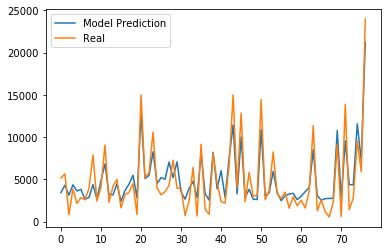

Prediction :  3420.12       real : 5152.0
Prediction :  4305.75       real : 5635.0
Prediction :  3119.34       real : 805.0
Prediction :  4339.17       real : 3829.0
Prediction :  3620.64       real : 2149.0
Prediction :  3804.45       real : 2821.0
Prediction :  2618.04       real : 2569.0
Prediction :  2851.98       real : 3913.0
Prediction :  4372.59       real : 7854.0
Prediction :  2668.17       real : 2422.0
Prediction :  4840.47       real : 4067.0
Prediction :  6828.96       real : 9051.0
Prediction :  3202.89       real : 2282.0
Prediction :  3152.76       real : 4172.0
Prediction :  4472.85       real : 4977.0
Prediction :  2384.1       real : 1617.0
Prediction :  3670.77       real : 3192.0
Prediction :  4422.719999999999       real : 3437.0
Prediction :  5475.45       real : 4494.0
Prediction :  2785.14       real : 840.0
Prediction :  12844.56       real : 14973.0
Prediction :  5074.41       real : 5180.0
Prediction :  5458.74       real : 5775.0
Prediction :  8266.02    

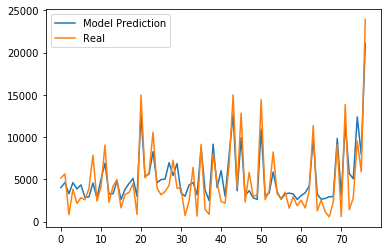

Prediction :  4021.68       real : 5152.0
Prediction :  4606.530000000001       real : 5635.0
Prediction :  3286.44       real : 805.0
Prediction :  4606.530000000001       real : 3829.0
Prediction :  3854.58       real : 2149.0
Prediction :  4339.17       real : 2821.0
Prediction :  2851.98       real : 2569.0
Prediction :  2918.82       real : 3913.0
Prediction :  4556.4       real : 7854.0
Prediction :  2801.85       real : 2422.0
Prediction :  4974.15       real : 4067.0
Prediction :  6912.51       real : 9051.0
Prediction :  3253.02       real : 2282.0
Prediction :  3286.44       real : 4172.0
Prediction :  4807.05       real : 4977.0
Prediction :  2601.33       real : 1617.0
Prediction :  3804.45       real : 3192.0
Prediction :  4489.5599999999995       real : 3437.0
Prediction :  5107.83       real : 4494.0
Prediction :  2985.66       real : 840.0
Prediction :  12644.04       real : 14973.0
Prediction :  5358.48       real : 5180.0
Prediction :  5609.13       real : 5775.0
Pred

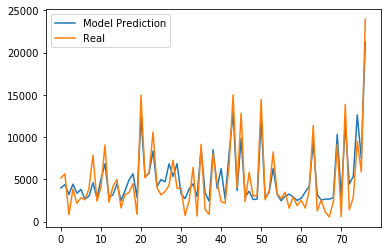

Prediction :  3971.55       real : 5152.0
Prediction :  4372.59       real : 5635.0
Prediction :  3202.89       real : 805.0
Prediction :  4422.719999999999       real : 3829.0
Prediction :  3353.28       real : 2149.0
Prediction :  3804.45       real : 2821.0
Prediction :  2651.46       real : 2569.0
Prediction :  2985.66       real : 3913.0
Prediction :  4589.82       real : 7854.0
Prediction :  2801.85       real : 2422.0
Prediction :  5007.57       real : 4067.0
Prediction :  6845.67       real : 9051.0
Prediction :  2918.82       real : 2282.0
Prediction :  3169.47       real : 4172.0
Prediction :  4472.85       real : 4977.0
Prediction :  2467.65       real : 1617.0
Prediction :  3654.06       real : 3192.0
Prediction :  4907.31       real : 3437.0
Prediction :  5642.55       real : 4494.0
Prediction :  2851.98       real : 840.0
Prediction :  12376.68       real : 14973.0
Prediction :  5308.35       real : 5180.0
Prediction :  5692.68       real : 5775.0
Prediction :  8349.57   

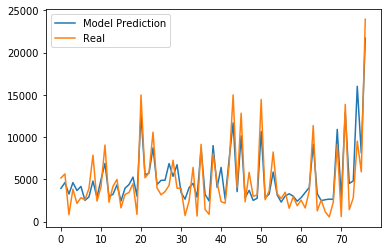

Prediction :  3921.42       real : 5152.0
Prediction :  4606.530000000001       real : 5635.0
Prediction :  3253.02       real : 805.0
Prediction :  4606.530000000001       real : 3829.0
Prediction :  3670.77       real : 2149.0
Prediction :  4155.360000000001       real : 2821.0
Prediction :  2501.0699999999997       real : 2569.0
Prediction :  2918.82       real : 3913.0
Prediction :  4790.34       real : 7854.0
Prediction :  2868.69       real : 2422.0
Prediction :  4940.73       real : 4067.0
Prediction :  6879.09       real : 9051.0
Prediction :  2968.95       real : 2282.0
Prediction :  3219.6       real : 4172.0
Prediction :  4339.17       real : 4977.0
Prediction :  2417.52       real : 1617.0
Prediction :  3938.13       real : 3192.0
Prediction :  4372.59       real : 3437.0
Prediction :  5258.22       real : 4494.0
Prediction :  3002.37       real : 840.0
Prediction :  12677.46       real : 14973.0
Prediction :  5508.87       real : 5180.0
Prediction :  5742.81       real : 5

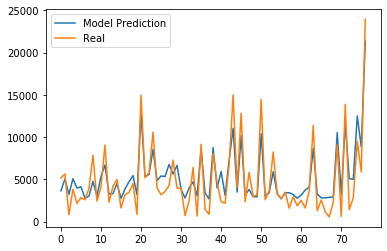

Prediction :  3637.35       real : 5152.0
Prediction :  5040.99       real : 5635.0
Prediction :  3202.89       real : 805.0
Prediction :  5074.41       real : 3829.0
Prediction :  3954.84       real : 2149.0
Prediction :  4121.9400000000005       real : 2821.0
Prediction :  2768.43       real : 2569.0
Prediction :  3002.37       real : 3913.0
Prediction :  4756.92       real : 7854.0
Prediction :  3002.37       real : 2422.0
Prediction :  5325.06       real : 4067.0
Prediction :  6695.28       real : 9051.0
Prediction :  3269.73       real : 2282.0
Prediction :  3303.15       real : 4172.0
Prediction :  4506.27       real : 4977.0
Prediction :  2735.01       real : 1617.0
Prediction :  3854.58       real : 3192.0
Prediction :  4706.79       real : 3437.0
Prediction :  5442.03       real : 4494.0
Prediction :  3152.76       real : 840.0
Prediction :  12844.56       real : 14973.0
Prediction :  5308.35       real : 5180.0
Prediction :  5559.0       real : 5775.0
Prediction :  8550.09   

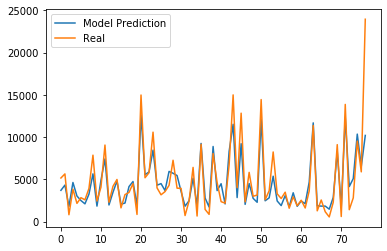

Prediction :  3692.075       real : 5152.0
Prediction :  4310.975       real : 5635.0
Prediction :  1794.115       real : 805.0
Prediction :  4620.425       real : 3829.0
Prediction :  3021.6       real : 2149.0
Prediction :  2485.2200000000003       real : 2821.0
Prediction :  2093.25       real : 2569.0
Prediction :  3238.215       real : 3913.0
Prediction :  5641.61       real : 7854.0
Prediction :  1825.06       real : 2422.0
Prediction :  4888.615       real : 4067.0
Prediction :  7405.475       real : 9051.0
Prediction :  1959.155       real : 2282.0
Prediction :  3465.145       real : 4172.0
Prediction :  4795.78       real : 4977.0
Prediction :  2051.99       real : 1617.0
Prediction :  2186.085       real : 3192.0
Prediction :  4135.62       real : 3437.0
Prediction :  4733.89       real : 4494.0
Prediction :  1856.005       real : 840.0
Prediction :  12614.55       real : 14973.0
Prediction :  5538.46       real : 5180.0
Prediction :  5868.54       real : 5775.0
Prediction : 

In [7]:
all_test_y = []
all_test_predication = []
avg_ame=0
for i in range(number_of_folds):
    print(" ")
    print("Fold ","#",i+1)
    start  = time.time()
    model = RegressionTsetlinMachine(3000, 1400, 3.2)
    
    train_data, test_data = trainTestSpliter(foldsIndex[i],scaled_data)
    train_x, train_y, test_x, test_y = dataTargetSpluter(train_data,test_data)
    
    b = Binarizer(max_bits_per_feature = 10)
    b.fit(train_x)
    X_transformed_train = b.transform(train_x)
    
    b = Binarizer(max_bits_per_feature = 10)
    b.fit(test_x)
    X_transformed_test = b.transform(test_x)
    
    model.fit(X_transformed_train, train_y, epochs=150)
    
    all_data_x =[]
    all_data_y = []

    for i in scaled_data:
        all_data_x.append(i[:9])
        all_data_y.append(i[9])

    all_data_x = np.array(all_data_x)
    all_data_y = np.array(all_data_y)
    
    b = Binarizer(max_bits_per_feature = 10)
    b.fit(all_data_x)
    X_transformed_all_data_x = b.transform(all_data_x)
    prediction = model.predict(X_transformed_all_data_x)
    end = time.time()

    plt.plot(prediction, label="Model Prediction")
    plt.plot(all_data_y, label="Real")
    plt.legend()
    plt.show()


    for i in range(len(prediction)):
        print("Prediction : ", prediction[i],"     ","real :", all_data_y[i])
    print("All-data-MAE: ",mean_absolute_error(all_data_y,prediction))
    
    prediction = model.predict(X_transformed_test)
    print("Test-MAE: ",mean_absolute_error(test_y,prediction))
    all_test_y.append(test_y)
    all_test_predication.append(prediction)
    avg_ame+=mean_absolute_error(test_y,prediction)
    print("Took: ",end-start, "Seconds")
    print("#################################################################################################")
print("\n \n avg test-MAE : ",avg_ame/number_of_folds)

In [8]:
import statistics 
maes=[]
pred_25 = []
pred_50 = []
for i in range(len(all_test_y)):
    #print((abs(all_test_y[i]-all_test_predication[i])/all_test_y[i]))
    maes.append((abs(all_test_y[i]-all_test_predication[i])/all_test_y[i]))
    if (abs(all_test_y[i]-all_test_predication[i])/all_test_y[i])<0.25:
        pred_25.append(abs(all_test_y[i]-all_test_predication[i])/all_test_y[i])
    if (abs(all_test_y[i]-all_test_predication[i])/all_test_y[i])<0.50:
        pred_50.append(abs(all_test_y[i]-all_test_predication[i])/all_test_y[i])
sum = 0
for i in maes:
    sum+=i
print("MMRE", sum/len(maes))
print("PRED 0.25: ", (((100/77)*len(pred_25)))/100)
print("PRED 0.50: ", (((100/77)*len(pred_50)))/100)
print("Median: ",statistics.median(maes))

MMRE [1.81595895]
PRED 0.25:  0.15584415584415584
PRED 0.50:  0.3246753246753247
Median:  [0.9091129]
